In [1]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import colors
from sqlite3 import Error


In [2]:
#reading the csv file from milestone2 to a dataframe
csv_data = pd.read_csv('csv_dataset.csv')
csv_data.head(20)

,Unnamed: 0,COVID_status,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,0,confirmed,Afghanistan,0,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,1,confirmed,Albania,0,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099
2,2,confirmed,Algeria,0,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134
3,3,confirmed,Andorra,0,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764
4,4,confirmed,Angola,0,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81
5,5,confirmed,Antigua and Barbuda,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,6,confirmed,Argentina,0,0,0,0,0,0,0,...,9283,9931,10649,11353,12076,12628,13228,13933,14702,15419
7,7,confirmed,Armenia,0,0,0,0,0,0,0,...,5271,5606,5928,6302,6661,7113,7402,7774,8216,8676
8,8,confirmed,Australia,0,0,0,0,4,5,5,...,7081,7095,7099,7114,7114,7126,7139,7150,7165,7184
9,9,confirmed,Austria,0,0,0,0,0,0,0,...,16353,16404,16436,16486,16503,16539,16557,16591,16628,16655


In [3]:
#reading the web data saved as csv file from milestone3 to a dataframe
web_data = pd.read_csv('web_dataset.csv')
web_data.head(20)

,Unnamed: 0,Unnamed: 0.1,Country,Continent,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_per_1_million_pop,Deaths_per_1_million_pop,Total_Tests,Tests_per_1_million_pop,Population
0,0,0,North America,North America,2038772,26796.0,123443,1481.0,661312.0,1254017.0,19277.0,NaN,NaN,NaN,NaN,NaN
1,1,1,South America,South America,844496,44442.0,39315,1137.0,345806.0,459375.0,11248.0,NaN,NaN,NaN,NaN,NaN
2,2,2,Europe,Europe,2004226,17357.0,173280,749.0,978232.0,852714.0,8796.0,NaN,NaN,NaN,NaN,NaN
3,3,3,Asia,Asia,1107521,27087.0,30207,541.0,672392.0,404922.0,13621.0,NaN,NaN,NaN,NaN,NaN
4,4,4,Africa,Africa,142889,5345.0,4072,127.0,60671.0,78146.0,370.0,NaN,NaN,NaN,NaN,NaN
5,5,5,Oceania,Australia/Oceania,8794,12.0,125,NaN,8188.0,481.0,4.0,NaN,NaN,NaN,NaN,NaN
6,6,6,World,All,6147419,121039.0,370457,4035.0,2727252.0,3049710.0,53320.0,789.0,47.5,NaN,NaN,NaN
7,7,7,USA,North America,1815270,21740.0,105532,990.0,530201.0,1179537.0,17012.0,5487.0,319.0,17190520.0,51961.0,3.308329e+08
8,8,8,Brazil,South America,498440,30102.0,28834,890.0,205371.0,264235.0,8318.0,2346.0,136.0,930013.0,4378.0,2.124263e+08
9,9,9,Russia,Europe,396575,8952.0,4555,181.0,167469.0,224551.0,2300.0,2718.0,31.0,10316200.0,70693.0,1.459292e+08


In [4]:
#reading the API data saved as csv file from milestone4 to a dataframe
api_data = pd.read_csv('api_dataset.csv')
api_data.head(20)

,Unnamed: 0,Indicators,01/22/2020,01/23/2020,01/24/2020,01/27/2020,01/28/2020,01/29/2020,01/30/2020,01/31/2020,...,05/19/2020,05/20/2020,05/21/2020,05/22/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,Index_Name
0,0,date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,NaN,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,NYA
1,1,close,14110.240234,14102.040038999998,13978.469727000003,13769.599609,13877.610352000003,13843.80957,13861.919922,13614.099609,...,11248.969727,11420.040039,11351.599609,11331.967773,NaN,11603.0,11837.530273,11804.910156,11802.950195,NYA
2,2,date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,NaN,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,DJI
3,3,close,29186.269531,29160.089844,28989.730469,28535.800781,28722.849608999997,28734.449219,28859.439452999995,28256.029297000005,...,24206.859375,24575.900391,24474.119141,24465.160156,NaN,24995.109375,25548.269531,25400.640625,25383.109375,DJI
4,4,date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,2020-05-25 00:00:00,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,BUK100P
5,5,close,12816.950195,12716.870117,12862.459961,12558.990234,12680.370117,12691.30957,12505.650391,12339.200195,...,10153.009766,10265.429688,10172.650391,10134.860352,10134.860352,10259.540039,10376.589844,10530.230469,10246.799805,BUK100P
6,6,date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,NaN,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,BSESN
7,7,close,41115.378906,41386.398438,41613.191406,41155.121094,40966.859375,41198.660156,40913.820313,40723.488281,...,30196.169922000005,30818.609375,30932.900391000006,30672.589844,NaN,30609.300781,31605.220702999995,32200.589844,32424.099609,BSESN


In [5]:
# Renaming columns in preparation to merge data
web_data.rename(columns = {'Country_Other':'Country'}, inplace = True) 


In [6]:
# Merging data and storing it into a new dataframe
df = pd.merge(csv_data, web_data, on='Country' )

In [7]:
df

,Unnamed: 0_x,COVID_status,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_per_1_million_pop,Deaths_per_1_million_pop,Total_Tests,Tests_per_1_million_pop,Population
0,0,confirmed,Afghanistan,0,0,0,0,0,0,0,...,249,3.0,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0
1,188,deaths,Afghanistan,0,0,0,0,0,0,0,...,249,3.0,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0
2,376,recovered,Afghanistan,0,0,0,0,0,0,0,...,249,3.0,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0
3,1,confirmed,Albania,0,0,0,0,0,0,0,...,33,NaN,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0
4,189,deaths,Albania,0,0,0,0,0,0,0,...,33,NaN,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,374,deaths,Tajikistan,0,0,0,0,0,0,0,...,47,NaN,1865.0,1895.0,NaN,400.0,5.0,NaN,NaN,9516984.0
515,562,recovered,Tajikistan,0,0,0,0,0,0,0,...,47,NaN,1865.0,1895.0,NaN,400.0,5.0,NaN,NaN,9516984.0
516,187,confirmed,Lesotho,0,0,0,0,0,0,0,...,,NaN,1.0,1.0,NaN,0.9,NaN,283.0,132.0,2140745.0
517,375,deaths,Lesotho,0,0,0,0,0,0,0,...,,NaN,1.0,1.0,NaN,0.9,NaN,283.0,132.0,2140745.0


 # Checking data types of merged (csv_data and web_data) dataframe 'df' and api_data to see if they are compatible for merging. 

In [8]:
df.dtypes

Unnamed: 0_x                     int64
COVID_status                    object
Country                         object
1/22/20                          int64
1/23/20                          int64
                                ...   
Tot_Cases_per_1_million_pop    float64
Deaths_per_1_million_pop       float64
Total_Tests                    float64
Tests_per_1_million_pop        float64
Population                     float64
Length: 147, dtype: object

In [9]:
api_data.dtypes

Unnamed: 0     int64
Indicators    object
01/22/2020    object
01/23/2020    object
01/24/2020    object
               ...  
05/26/2020    object
05/27/2020    object
05/28/2020    object
05/29/2020    object
Index_Name    object
Length: 97, dtype: object

I am changing column names of columns so that both datasets have commin columns to merge. 

In [12]:
df.columns = df.columns.str.replace("/", "_")


In [13]:
df

,Unnamed: 0_x,COVID_status,Country,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,...,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_per_1_million_pop,Deaths_per_1_million_pop,Total_Tests,Tests_per_1_million_pop,Population
0,0,confirmed,Afghanistan,0,0,0,0,0,0,0,...,249,3.0,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0
1,188,deaths,Afghanistan,0,0,0,0,0,0,0,...,249,3.0,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0
2,376,recovered,Afghanistan,0,0,0,0,0,0,0,...,249,3.0,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0
3,1,confirmed,Albania,0,0,0,0,0,0,0,...,33,NaN,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0
4,189,deaths,Albania,0,0,0,0,0,0,0,...,33,NaN,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,374,deaths,Tajikistan,0,0,0,0,0,0,0,...,47,NaN,1865.0,1895.0,NaN,400.0,5.0,NaN,NaN,9516984.0
515,562,recovered,Tajikistan,0,0,0,0,0,0,0,...,47,NaN,1865.0,1895.0,NaN,400.0,5.0,NaN,NaN,9516984.0
516,187,confirmed,Lesotho,0,0,0,0,0,0,0,...,,NaN,1.0,1.0,NaN,0.9,NaN,283.0,132.0,2140745.0
517,375,deaths,Lesotho,0,0,0,0,0,0,0,...,,NaN,1.0,1.0,NaN,0.9,NaN,283.0,132.0,2140745.0


In [14]:
api_data.columns = api_data.columns.str.replace("/", "_")
api_data.columns = api_data.columns.str.rstrip('20')
api_data.columns = api_data.columns.str.lstrip('0')
api_data = api_data.add_suffix('20')



api_data


,Unnamed: 20,Indicators20,1_22_20,1_23_20,1_24_20,1_27_20,1_28_20,1_29_20,1_30_20,1_31_20,...,5_19_20,5_20_20,5_21_20,5_22_20,5_25_20,5_26_20,5_27_20,5_28_20,5_29_20,Index_Name20
0,0,date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,NaN,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,NYA
1,1,close,14110.240234,14102.040038999998,13978.469727000003,13769.599609,13877.610352000003,13843.80957,13861.919922,13614.099609,...,11248.969727,11420.040039,11351.599609,11331.967773,NaN,11603.0,11837.530273,11804.910156,11802.950195,NYA
2,2,date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,NaN,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,DJI
3,3,close,29186.269531,29160.089844,28989.730469,28535.800781,28722.849608999997,28734.449219,28859.439452999995,28256.029297000005,...,24206.859375,24575.900391,24474.119141,24465.160156,NaN,24995.109375,25548.269531,25400.640625,25383.109375,DJI
4,4,date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,2020-05-25 00:00:00,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,BUK100P
5,5,close,12816.950195,12716.870117,12862.459961,12558.990234,12680.370117,12691.30957,12505.650391,12339.200195,...,10153.009766,10265.429688,10172.650391,10134.860352,10134.860352,10259.540039,10376.589844,10530.230469,10246.799805,BUK100P
6,6,date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,NaN,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,BSESN
7,7,close,41115.378906,41386.398438,41613.191406,41155.121094,40966.859375,41198.660156,40913.820313,40723.488281,...,30196.169922000005,30818.609375,30932.900391000006,30672.589844,NaN,30609.300781,31605.220702999995,32200.589844,32424.099609,BSESN


 Dropping more columns and more cleaning

In [15]:
api_data = api_data[api_data['Indicators20'] != 'date']

In [16]:
api_data = api_data.loc[:,api_data.columns != 'Indicators20']

In [17]:
api_data = api_data.loc[:,api_data.columns != 'Unnamed: 20']

In [18]:
api_data

,1_22_20,1_23_20,1_24_20,1_27_20,1_28_20,1_29_20,1_30_20,1_31_20,2_01_20,2_03_20,...,5_19_20,5_20_20,5_21_20,5_22_20,5_25_20,5_26_20,5_27_20,5_28_20,5_29_20,Index_Name20
1,14110.240234,14102.040038999998,13978.469727000003,13769.599609,13877.610352000003,13843.80957,13861.919922,13614.099609,NaN,13677.919922,...,11248.969727,11420.040039,11351.599609,11331.967773,NaN,11603.0,11837.530273,11804.910156,11802.950195,NYA
3,29186.269531,29160.089844,28989.730469,28535.800781,28722.849608999997,28734.449219,28859.439452999995,28256.029297000005,NaN,28399.810547000005,...,24206.859375,24575.900391,24474.119141,24465.160156,NaN,24995.109375,25548.269531,25400.640625,25383.109375,DJI
5,12816.950195,12716.870117,12862.459961,12558.990234,12680.370117,12691.30957,12505.650391,12339.200195,NaN,12428.620117,...,10153.009766,10265.429688,10172.650391,10134.860352,10134.860352,10259.540039,10376.589844,10530.230469,10246.799805,BUK100P
7,41115.378906,41386.398438,41613.191406,41155.121094,40966.859375,41198.660156,40913.820313,40723.488281,39735.53125,39872.308594,...,30196.169922000005,30818.609375,30932.900391000006,30672.589844,NaN,30609.300781,31605.220702999995,32200.589844,32424.099609,BSESN


In [19]:
api_data = api_data.fillna(method = 'ffill')

In [20]:
api_data = api_data.fillna(0)

In [22]:
api_data.head()


,1_22_20,1_23_20,1_24_20,1_27_20,1_28_20,1_29_20,1_30_20,1_31_20,2_01_20,2_03_20,...,5_19_20,5_20_20,5_21_20,5_22_20,5_25_20,5_26_20,5_27_20,5_28_20,5_29_20,Index_Name20
1,14110.240234,14102.040038999998,13978.469727000003,13769.599609,13877.610352000003,13843.80957,13861.919922,13614.099609,0,13677.919922,...,11248.969727,11420.040039,11351.599609,11331.967773,0,11603.0,11837.530273,11804.910156,11802.950195,NYA
3,29186.269531,29160.089844,28989.730469,28535.800781,28722.849608999997,28734.449219,28859.439452999995,28256.029297000005,0,28399.810547000005,...,24206.859375,24575.900391,24474.119141,24465.160156,0,24995.109375,25548.269531,25400.640625,25383.109375,DJI
5,12816.950195,12716.870117,12862.459961,12558.990234,12680.370117,12691.30957,12505.650391,12339.200195,0,12428.620117,...,10153.009766,10265.429688,10172.650391,10134.860352,10134.860352,10259.540039,10376.589844,10530.230469,10246.799805,BUK100P
7,41115.378906,41386.398438,41613.191406,41155.121094,40966.859375,41198.660156,40913.820313,40723.488281,39735.53125,39872.308594,...,30196.169922000005,30818.609375,30932.900391000006,30672.589844,10134.860352,30609.300781,31605.220702999995,32200.589844,32424.099609,BSESN


In [23]:
# To merge the API data to the 'df' dataset, I have to make sure that the 'dates' of column names matches

In [24]:
api_data.columns = api_data.columns.str.replace("_0", "_")



# Here comes the final merge

In [25]:
final = df.append(api_data, sort=False)

In [26]:
final

,Unnamed: 0_x,COVID_status,Country,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,...,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_per_1_million_pop,Deaths_per_1_million_pop,Total_Tests,Tests_per_1_million_pop,Population,Index_Name20
0,0.0,confirmed,Afghanistan,0,0,0,0.0,0.0,0,0,...,3.0,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0,NaN
1,188.0,deaths,Afghanistan,0,0,0,0.0,0.0,0,0,...,3.0,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0,NaN
2,376.0,recovered,Afghanistan,0,0,0,0.0,0.0,0,0,...,3.0,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0,NaN
3,1.0,confirmed,Albania,0,0,0,0.0,0.0,0,0,...,NaN,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0,NaN
4,189.0,deaths,Albania,0,0,0,0.0,0.0,0,0,...,NaN,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,563.0,recovered,Lesotho,0,0,0,0.0,0.0,0,0,...,NaN,1.0,1.0,NaN,0.9,NaN,283.0,132.0,2140745.0,NaN
1,NaN,NaN,NaN,14110.240234,14102.040038999998,13978.469727000003,NaN,NaN,13769.599609,13877.610352000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYA
3,NaN,NaN,NaN,29186.269531,29160.089844,28989.730469,NaN,NaN,28535.800781,28722.849608999997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJI
5,NaN,NaN,NaN,12816.950195,12716.870117,12862.459961,NaN,NaN,12558.990234,12680.370117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUK100P


In [27]:
# Checking the csv file to see if everything is ok. 
# I only had to do this once and is not needed any more, so I am commenting it out

#final.to_csv('df_test2.csv')

In [28]:
final['Index_Name'] = np.nan

In [29]:
final = final.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0.1'], axis=1)

In [30]:
final = final.reset_index(drop=True)


In [31]:
final

,COVID_status,Country,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,1_29_20,...,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_per_1_million_pop,Deaths_per_1_million_pop,Total_Tests,Tests_per_1_million_pop,Population,Index_Name20,Index_Name
0,confirmed,Afghanistan,0,0,0,0.0,0.0,0,0,0,...,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0,NaN,NaN
1,deaths,Afghanistan,0,0,0,0.0,0.0,0,0,0,...,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0,NaN,NaN
2,recovered,Afghanistan,0,0,0,0.0,0.0,0,0,0,...,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0,NaN,NaN
3,confirmed,Albania,0,0,0,0.0,0.0,0,0,0,...,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0,NaN,NaN
4,deaths,Albania,0,0,0,0.0,0.0,0,0,0,...,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,recovered,Lesotho,0,0,0,0.0,0.0,0,0,0,...,1.0,1.0,NaN,0.9,NaN,283.0,132.0,2140745.0,NaN,NaN
519,NaN,NaN,14110.240234,14102.040038999998,13978.469727000003,NaN,NaN,13769.599609,13877.610352000003,13843.80957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYA,NaN
520,NaN,NaN,29186.269531,29160.089844,28989.730469,NaN,NaN,28535.800781,28722.849608999997,28734.449219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJI,NaN
521,NaN,NaN,12816.950195,12716.870117,12862.459961,NaN,NaN,12558.990234,12680.370117,12691.30957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUK100P,NaN


In [32]:
# Adding the stock indexes to the API data that was appended in the last 4 rows of the 'final' dataset

final.loc[[519,145],'Index_Name'] = 'NYA'
final.loc[[520,145],'Index_Name'] = 'DJI'
final.loc[[521,145],'Index_Name'] = 'BUK100P'
final.loc[[522,145],'Index_Name'] = 'BSESN'








In [33]:
final

,COVID_status,Country,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,1_29_20,...,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_per_1_million_pop,Deaths_per_1_million_pop,Total_Tests,Tests_per_1_million_pop,Population,Index_Name20,Index_Name
0,confirmed,Afghanistan,0,0,0,0.0,0.0,0,0,0,...,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0,NaN,NaN
1,deaths,Afghanistan,0,0,0,0.0,0.0,0,0,0,...,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0,NaN,NaN
2,recovered,Afghanistan,0,0,0,0.0,0.0,0,0,0,...,1303.0,12973.0,19.0,374.0,6.0,37348.0,961.0,38843762.0,NaN,NaN
3,confirmed,Albania,0,0,0,0.0,0.0,0,0,0,...,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0,NaN,NaN
4,deaths,Albania,0,0,0,0.0,0.0,0,0,0,...,857.0,232.0,5.0,390.0,11.0,14498.0,5037.0,2878060.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,recovered,Lesotho,0,0,0,0.0,0.0,0,0,0,...,1.0,1.0,NaN,0.9,NaN,283.0,132.0,2140745.0,NaN,NaN
519,NaN,NaN,14110.240234,14102.040038999998,13978.469727000003,NaN,NaN,13769.599609,13877.610352000003,13843.80957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYA,NYA
520,NaN,NaN,29186.269531,29160.089844,28989.730469,NaN,NaN,28535.800781,28722.849608999997,28734.449219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJI,DJI
521,NaN,NaN,12816.950195,12716.870117,12862.459961,NaN,NaN,12558.990234,12680.370117,12691.30957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUK100P,BUK100P


# Creating databse and uploading the file

In [34]:
conn = sqlite3.connect("ChamDB")

In [35]:
c = conn.cursor()

In [36]:
final.to_sql('finalDB', conn, if_exists="replace")

In [37]:
conn = sqlite3.connect("ChamDB")

In [38]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('finalDB',)]


In [39]:
c.execute("PRAGMA TABLE_INFO('finalDB')")

names = [tup[1] for tup in c.fetchall()]
print(names)

['index', 'COVID_status', 'Country', '1_22_20', '1_23_20', '1_24_20', '1_25_20', '1_26_20', '1_27_20', '1_28_20', '1_29_20', '1_30_20', '1_31_20', '2_1_20', '2_2_20', '2_3_20', '2_4_20', '2_5_20', '2_6_20', '2_7_20', '2_8_20', '2_9_20', '2_10_20', '2_11_20', '2_12_20', '2_13_20', '2_14_20', '2_15_20', '2_16_20', '2_17_20', '2_18_20', '2_19_20', '2_20_20', '2_21_20', '2_22_20', '2_23_20', '2_24_20', '2_25_20', '2_26_20', '2_27_20', '2_28_20', '2_29_20', '3_1_20', '3_2_20', '3_3_20', '3_4_20', '3_5_20', '3_6_20', '3_7_20', '3_8_20', '3_9_20', '3_10_20', '3_11_20', '3_12_20', '3_13_20', '3_14_20', '3_15_20', '3_16_20', '3_17_20', '3_18_20', '3_19_20', '3_20_20', '3_21_20', '3_22_20', '3_23_20', '3_24_20', '3_25_20', '3_26_20', '3_27_20', '3_28_20', '3_29_20', '3_30_20', '3_31_20', '4_1_20', '4_2_20', '4_3_20', '4_4_20', '4_5_20', '4_6_20', '4_7_20', '4_8_20', '4_9_20', '4_10_20', '4_11_20', '4_12_20', '4_13_20', '4_14_20', '4_15_20', '4_16_20', '4_17_20', '4_18_20', '4_19_20', '4_20_20', 

# Data visualization

In [40]:
final.dtypes

COVID_status                object
Country                     object
1_22_20                     object
1_23_20                     object
1_24_20                     object
                            ...   
Total_Tests                float64
Tests_per_1_million_pop    float64
Population                 float64
Index_Name20                object
Index_Name                  object
Length: 146, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121662490>]],
      dtype=object)

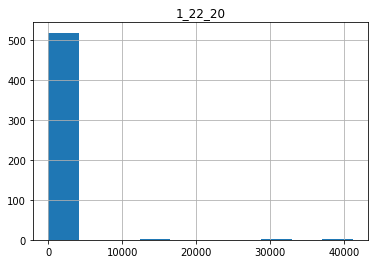

In [53]:
# A quick visualization of the frequency counts of COVID cases reported on January 22nd 2020
final.hist(column='1_22_20')

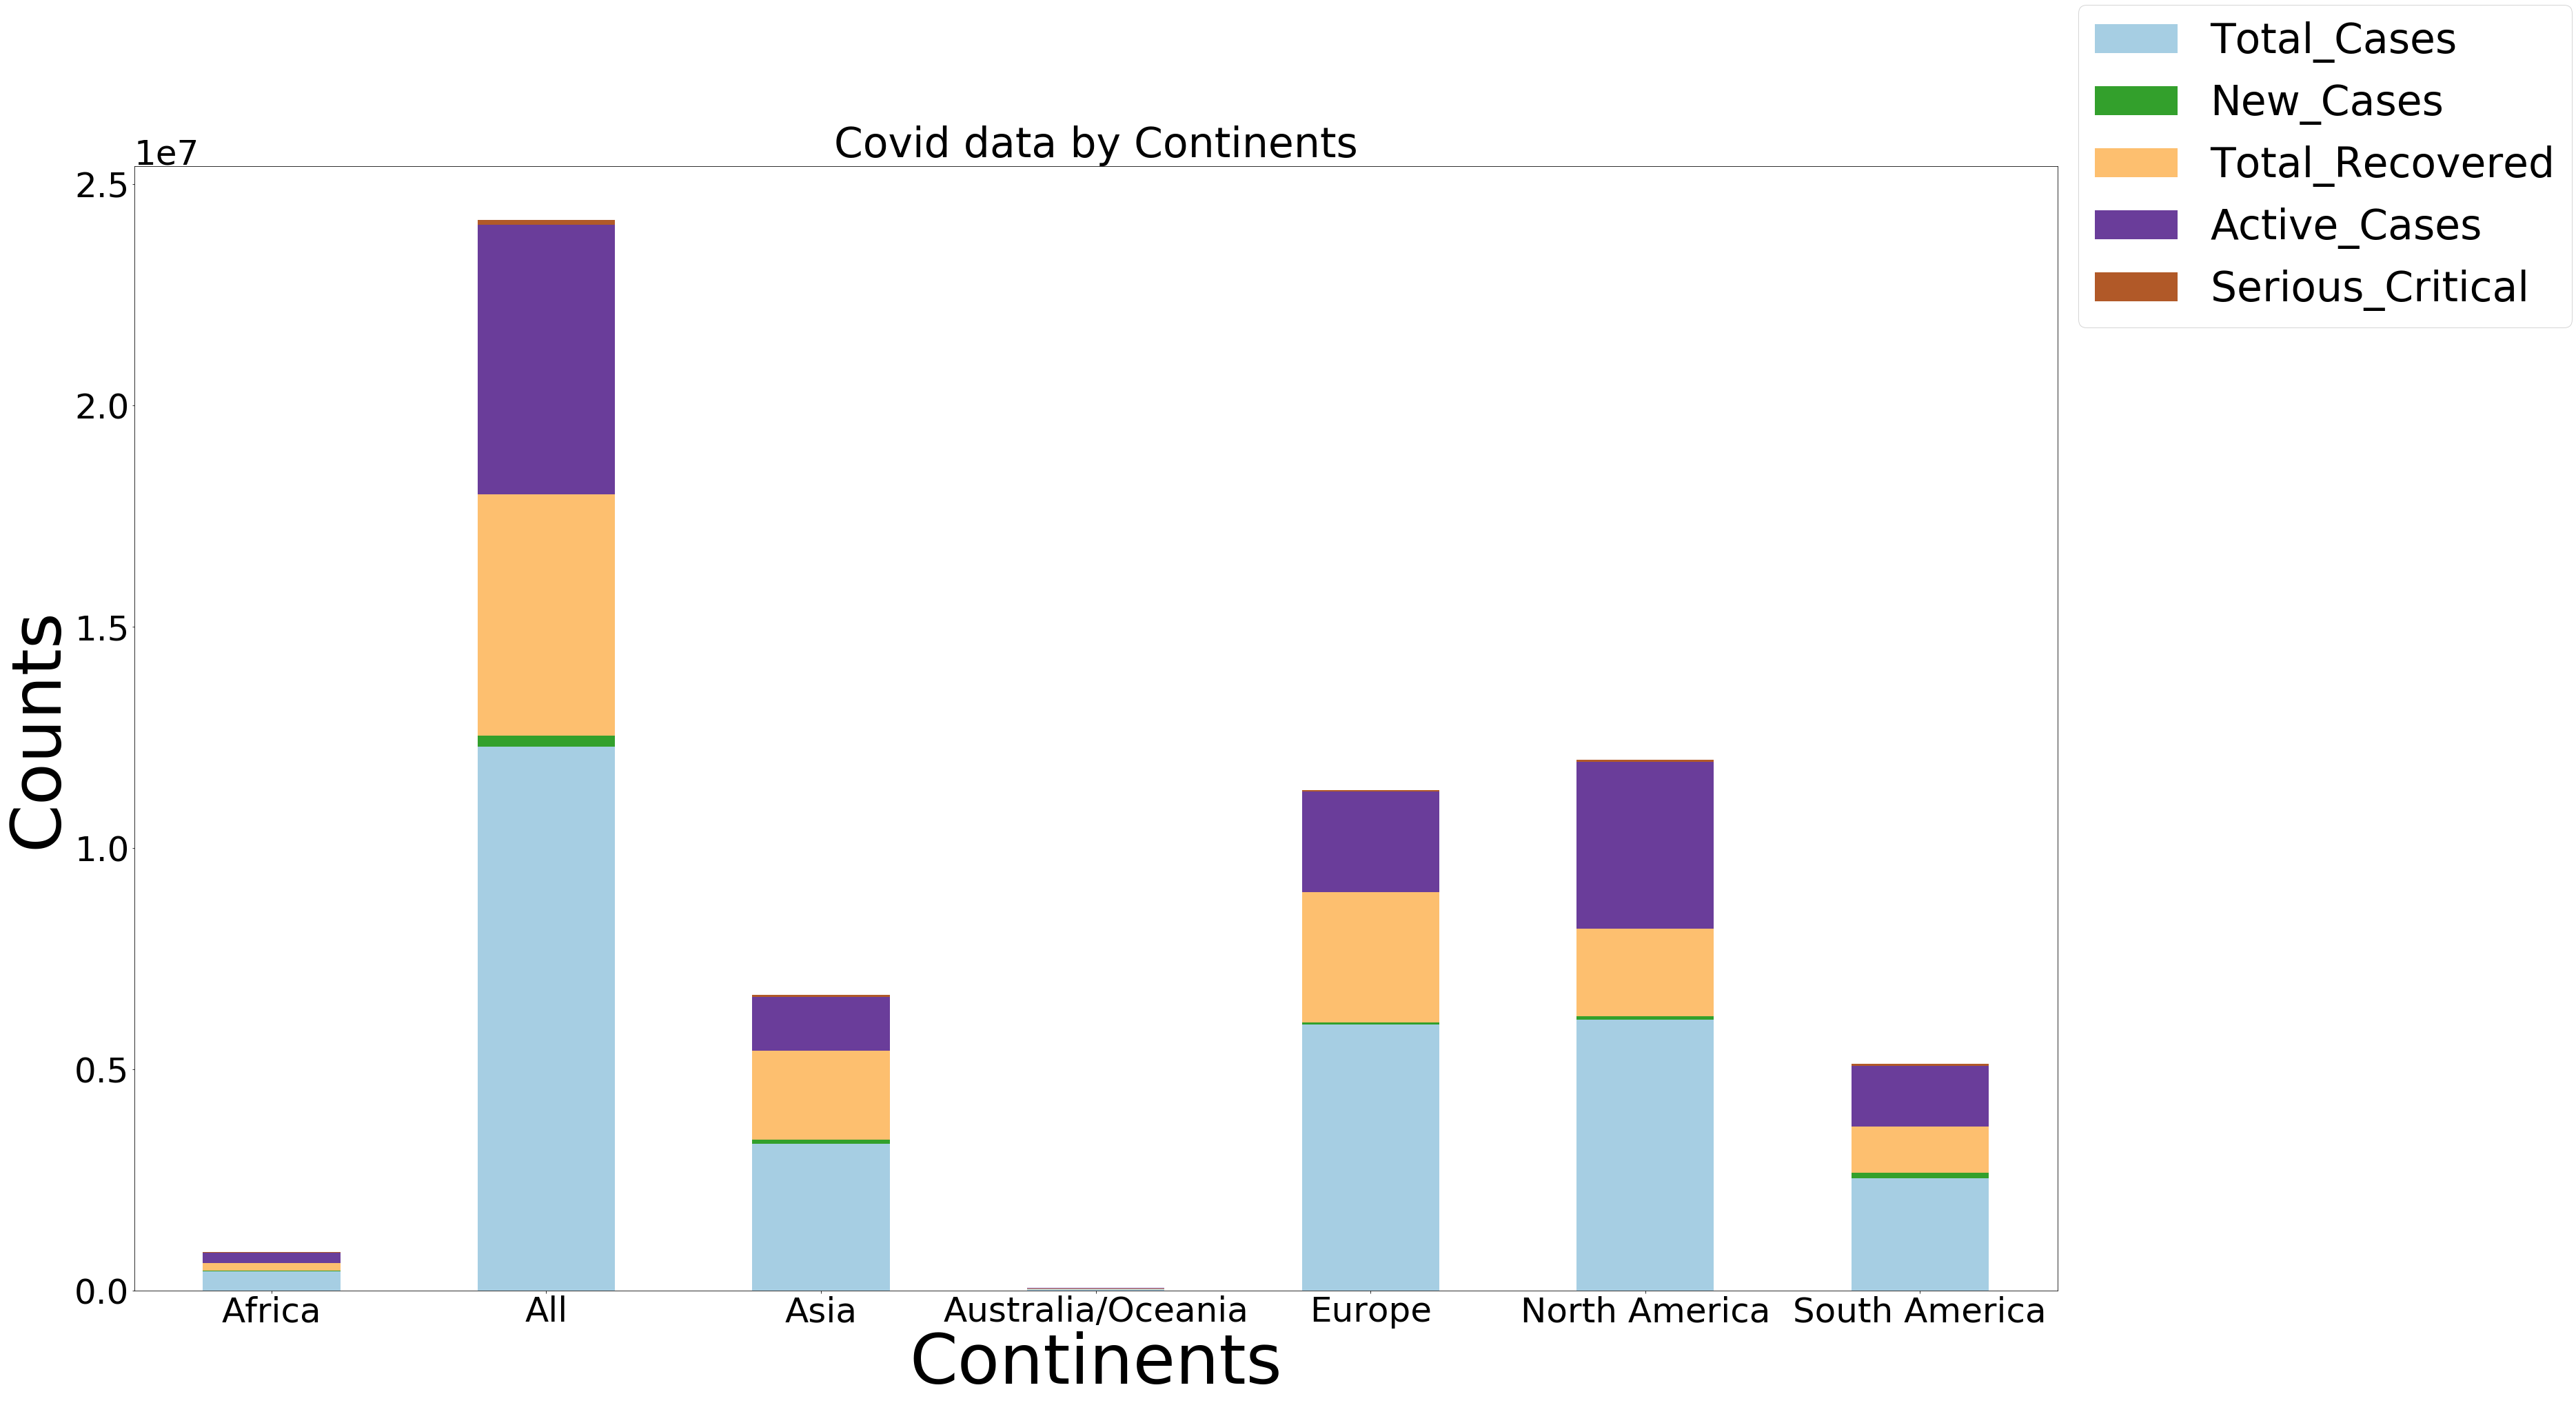

In [61]:
# Plotting the current numbers of COVID data

plt.rcParams['figure.figsize'] = (50, 30)

s = web_data.groupby(['Continent'])['Total_Cases', 'New_Cases', 'Total_Recovered', 'Active_Cases', 'Serious_Critical'].aggregate(np.sum)
ax = s.plot(kind='bar', stacked = True, colormap = 'Paired', rot = 0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1), prop={'size': 60})
plt.title('Covid data by Continents', fontsize = 60)
plt.xlabel('Continents', fontsize = 100)
plt.ylabel('Counts', fontsize = 100)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=50
plt.show()

In [72]:
df2 = csv_data.drop(['COVID_status', 'Country'], axis=1)

In [73]:
df2 = csv_data.drop(['Unnamed: 0'], axis=1)

In [75]:
df3 = csv_data.drop(['COVID_status', 'Country'], axis=1)

In [76]:
df3

,Unnamed: 0,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,0,0,0,0,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,1,0,0,0,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099
2,2,0,0,0,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134
3,3,0,0,0,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764
4,4,0,0,0,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,559,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,68,68,68,68
560,560,0,0,0,0,0,0,0,0,0,...,5,5,11,11,10,10,10,10,11,11
561,561,0,0,0,0,0,0,0,0,0,...,8,8,18,18,21,21,21,24,24,24
562,562,0,0,0,0,0,0,0,0,0,...,470,470,1089,1223,1301,1395,1417,1575,1674,1769


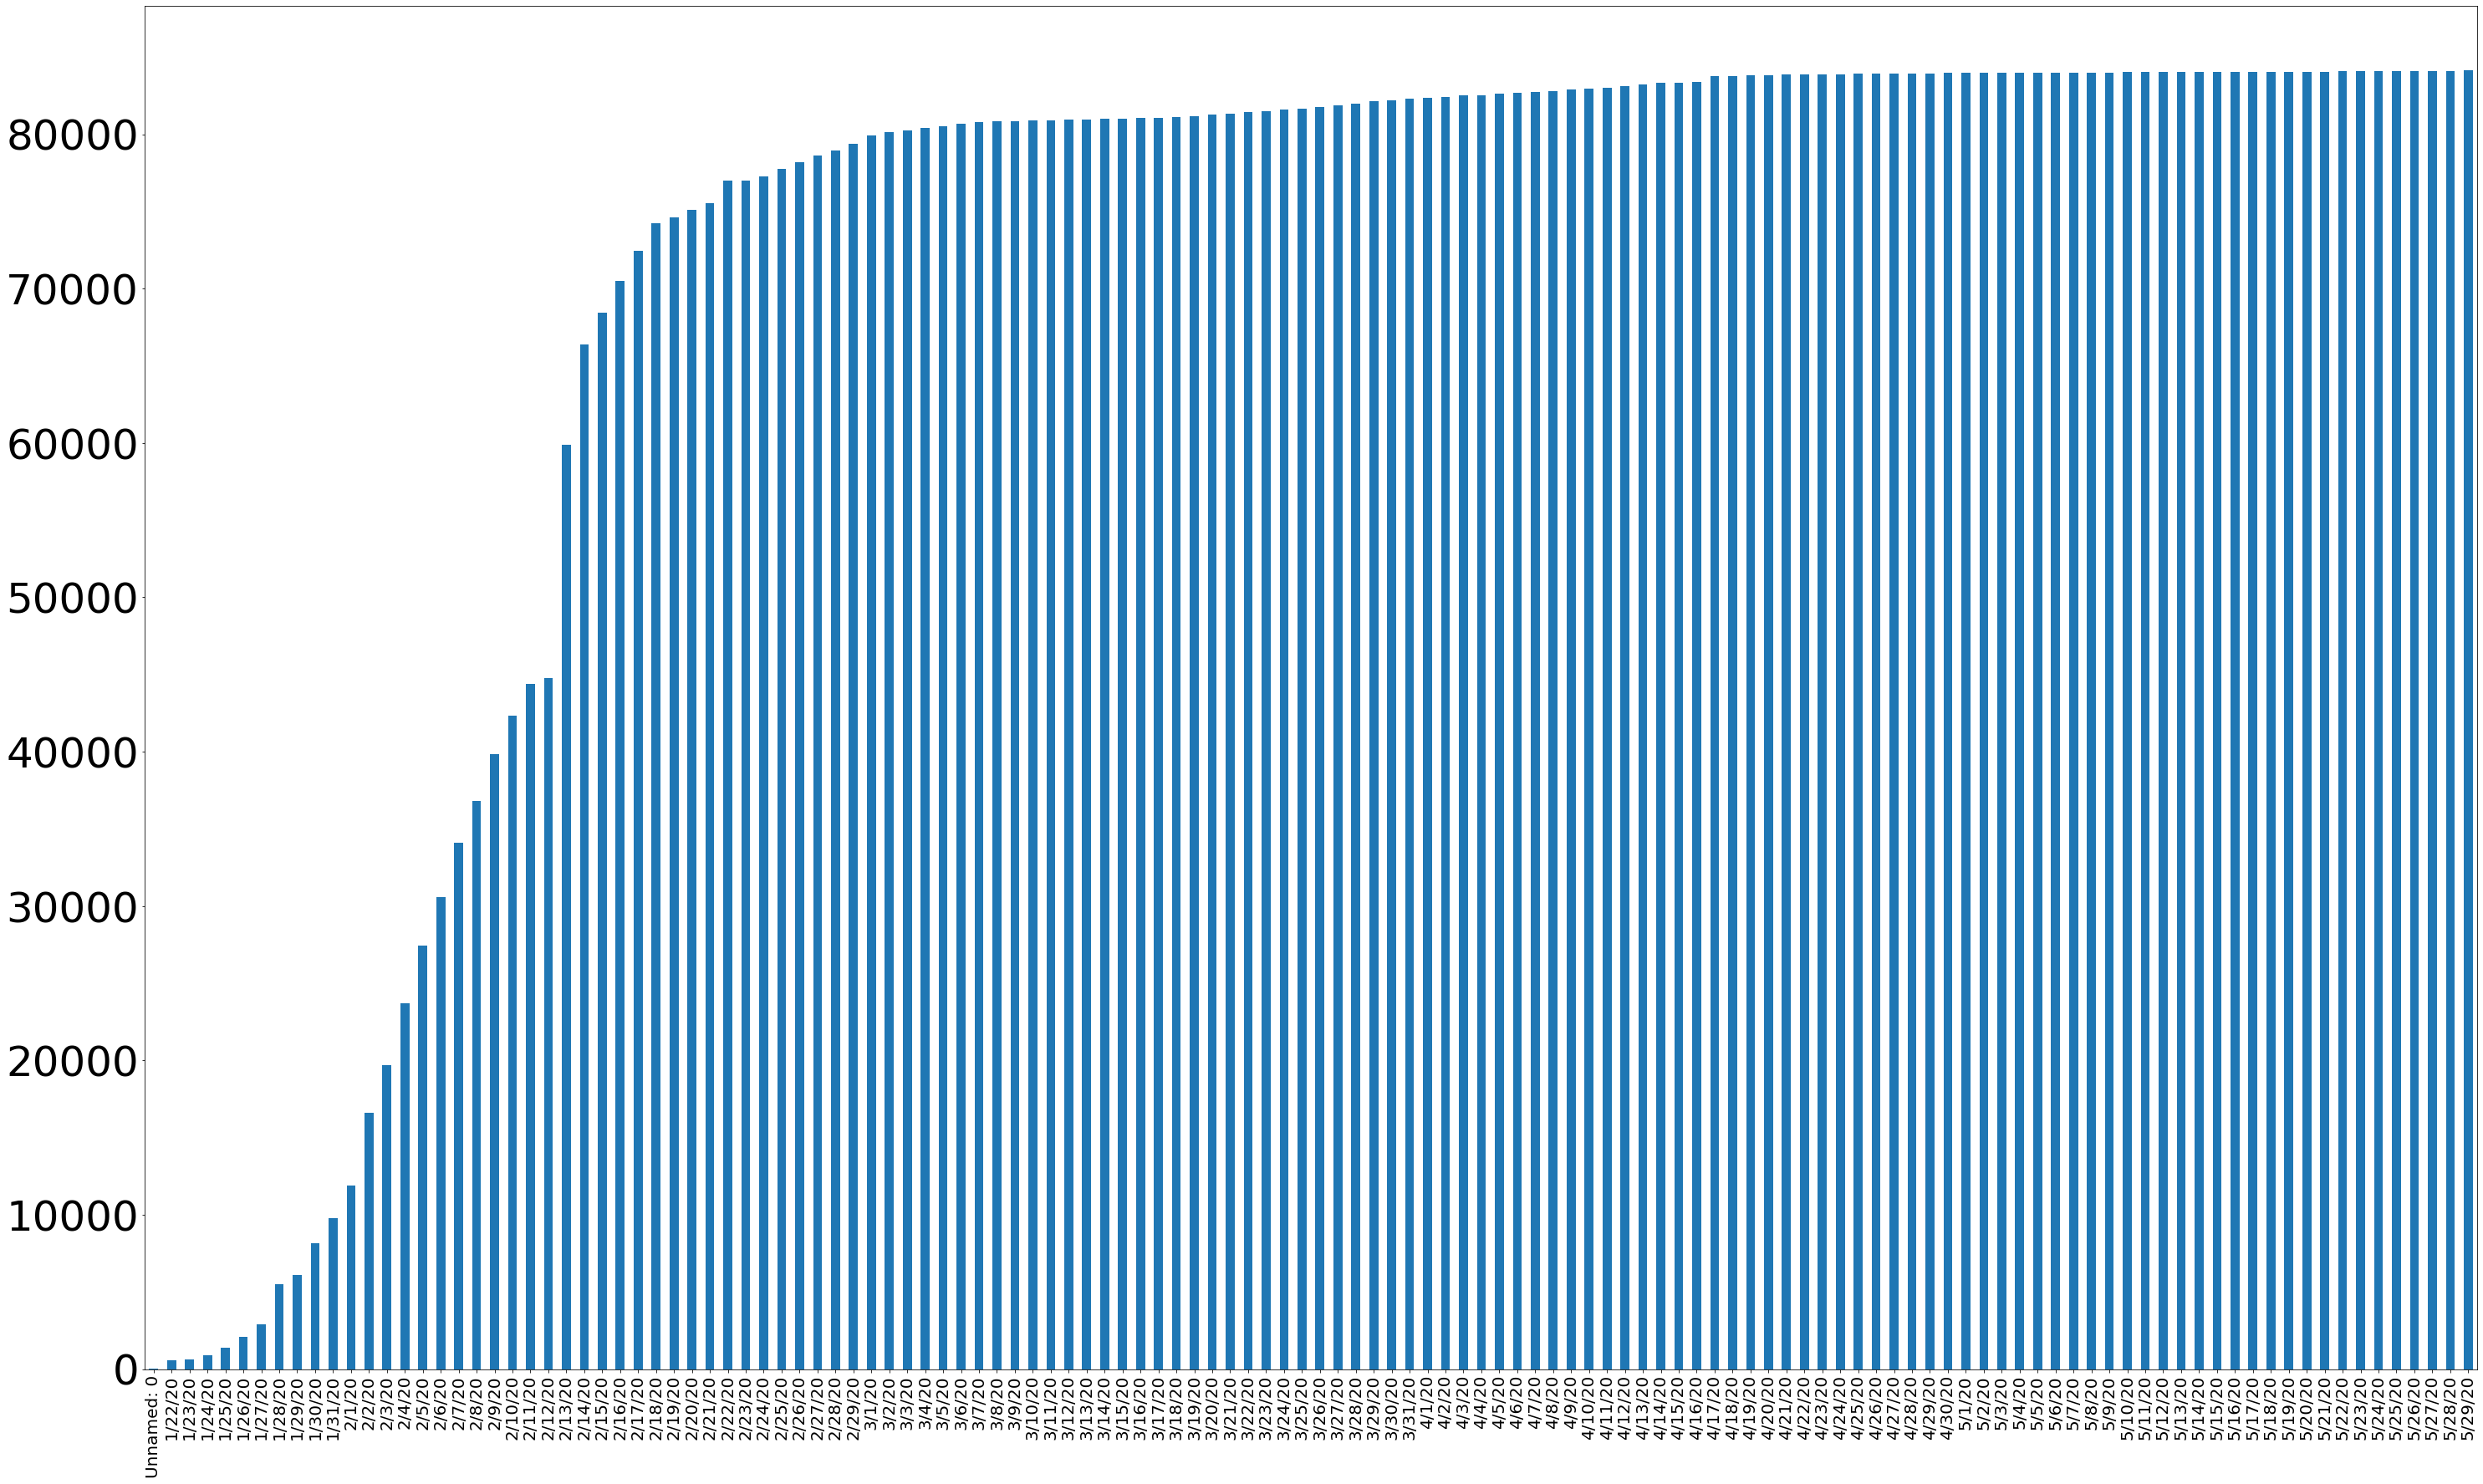

In [77]:
# Confirmed cases in China 
# Number of cases in China started increasing from end of January 

df3.T[32].plot.bar()

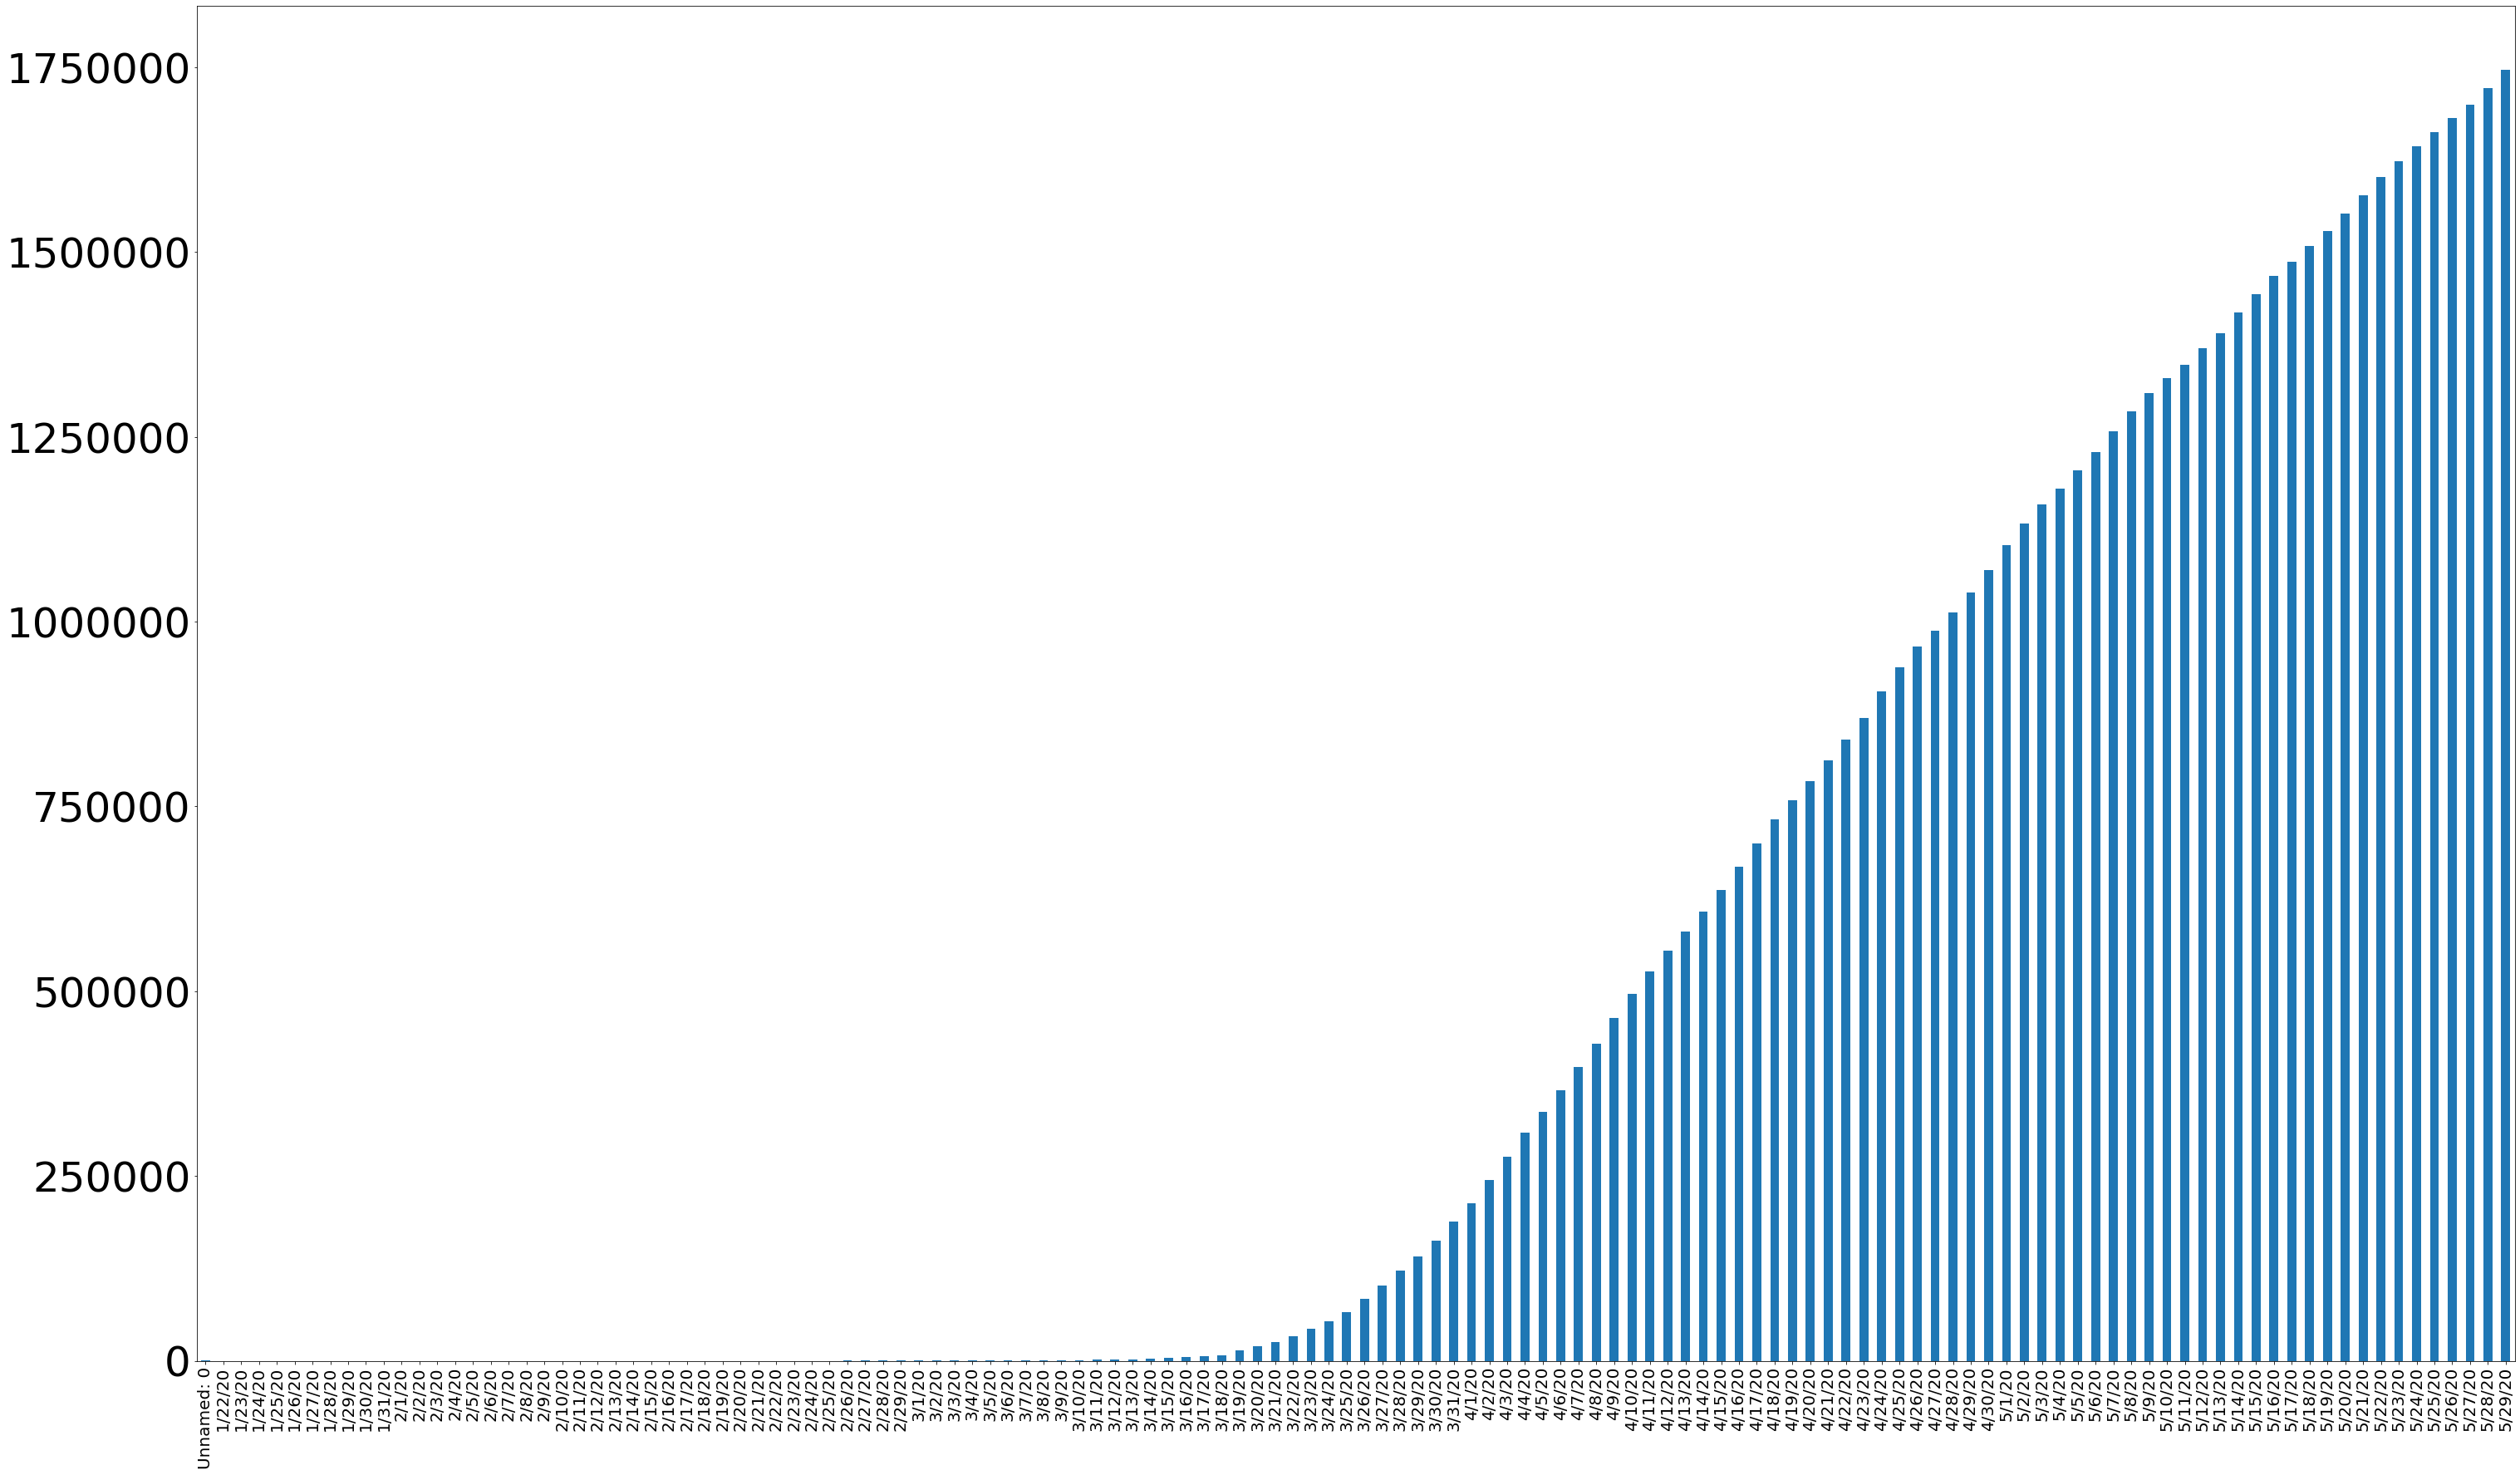

In [78]:
# Confirmed cases in US 
# Number of cases in US started increasing from mid of march 



df3.T[156].plot.bar()

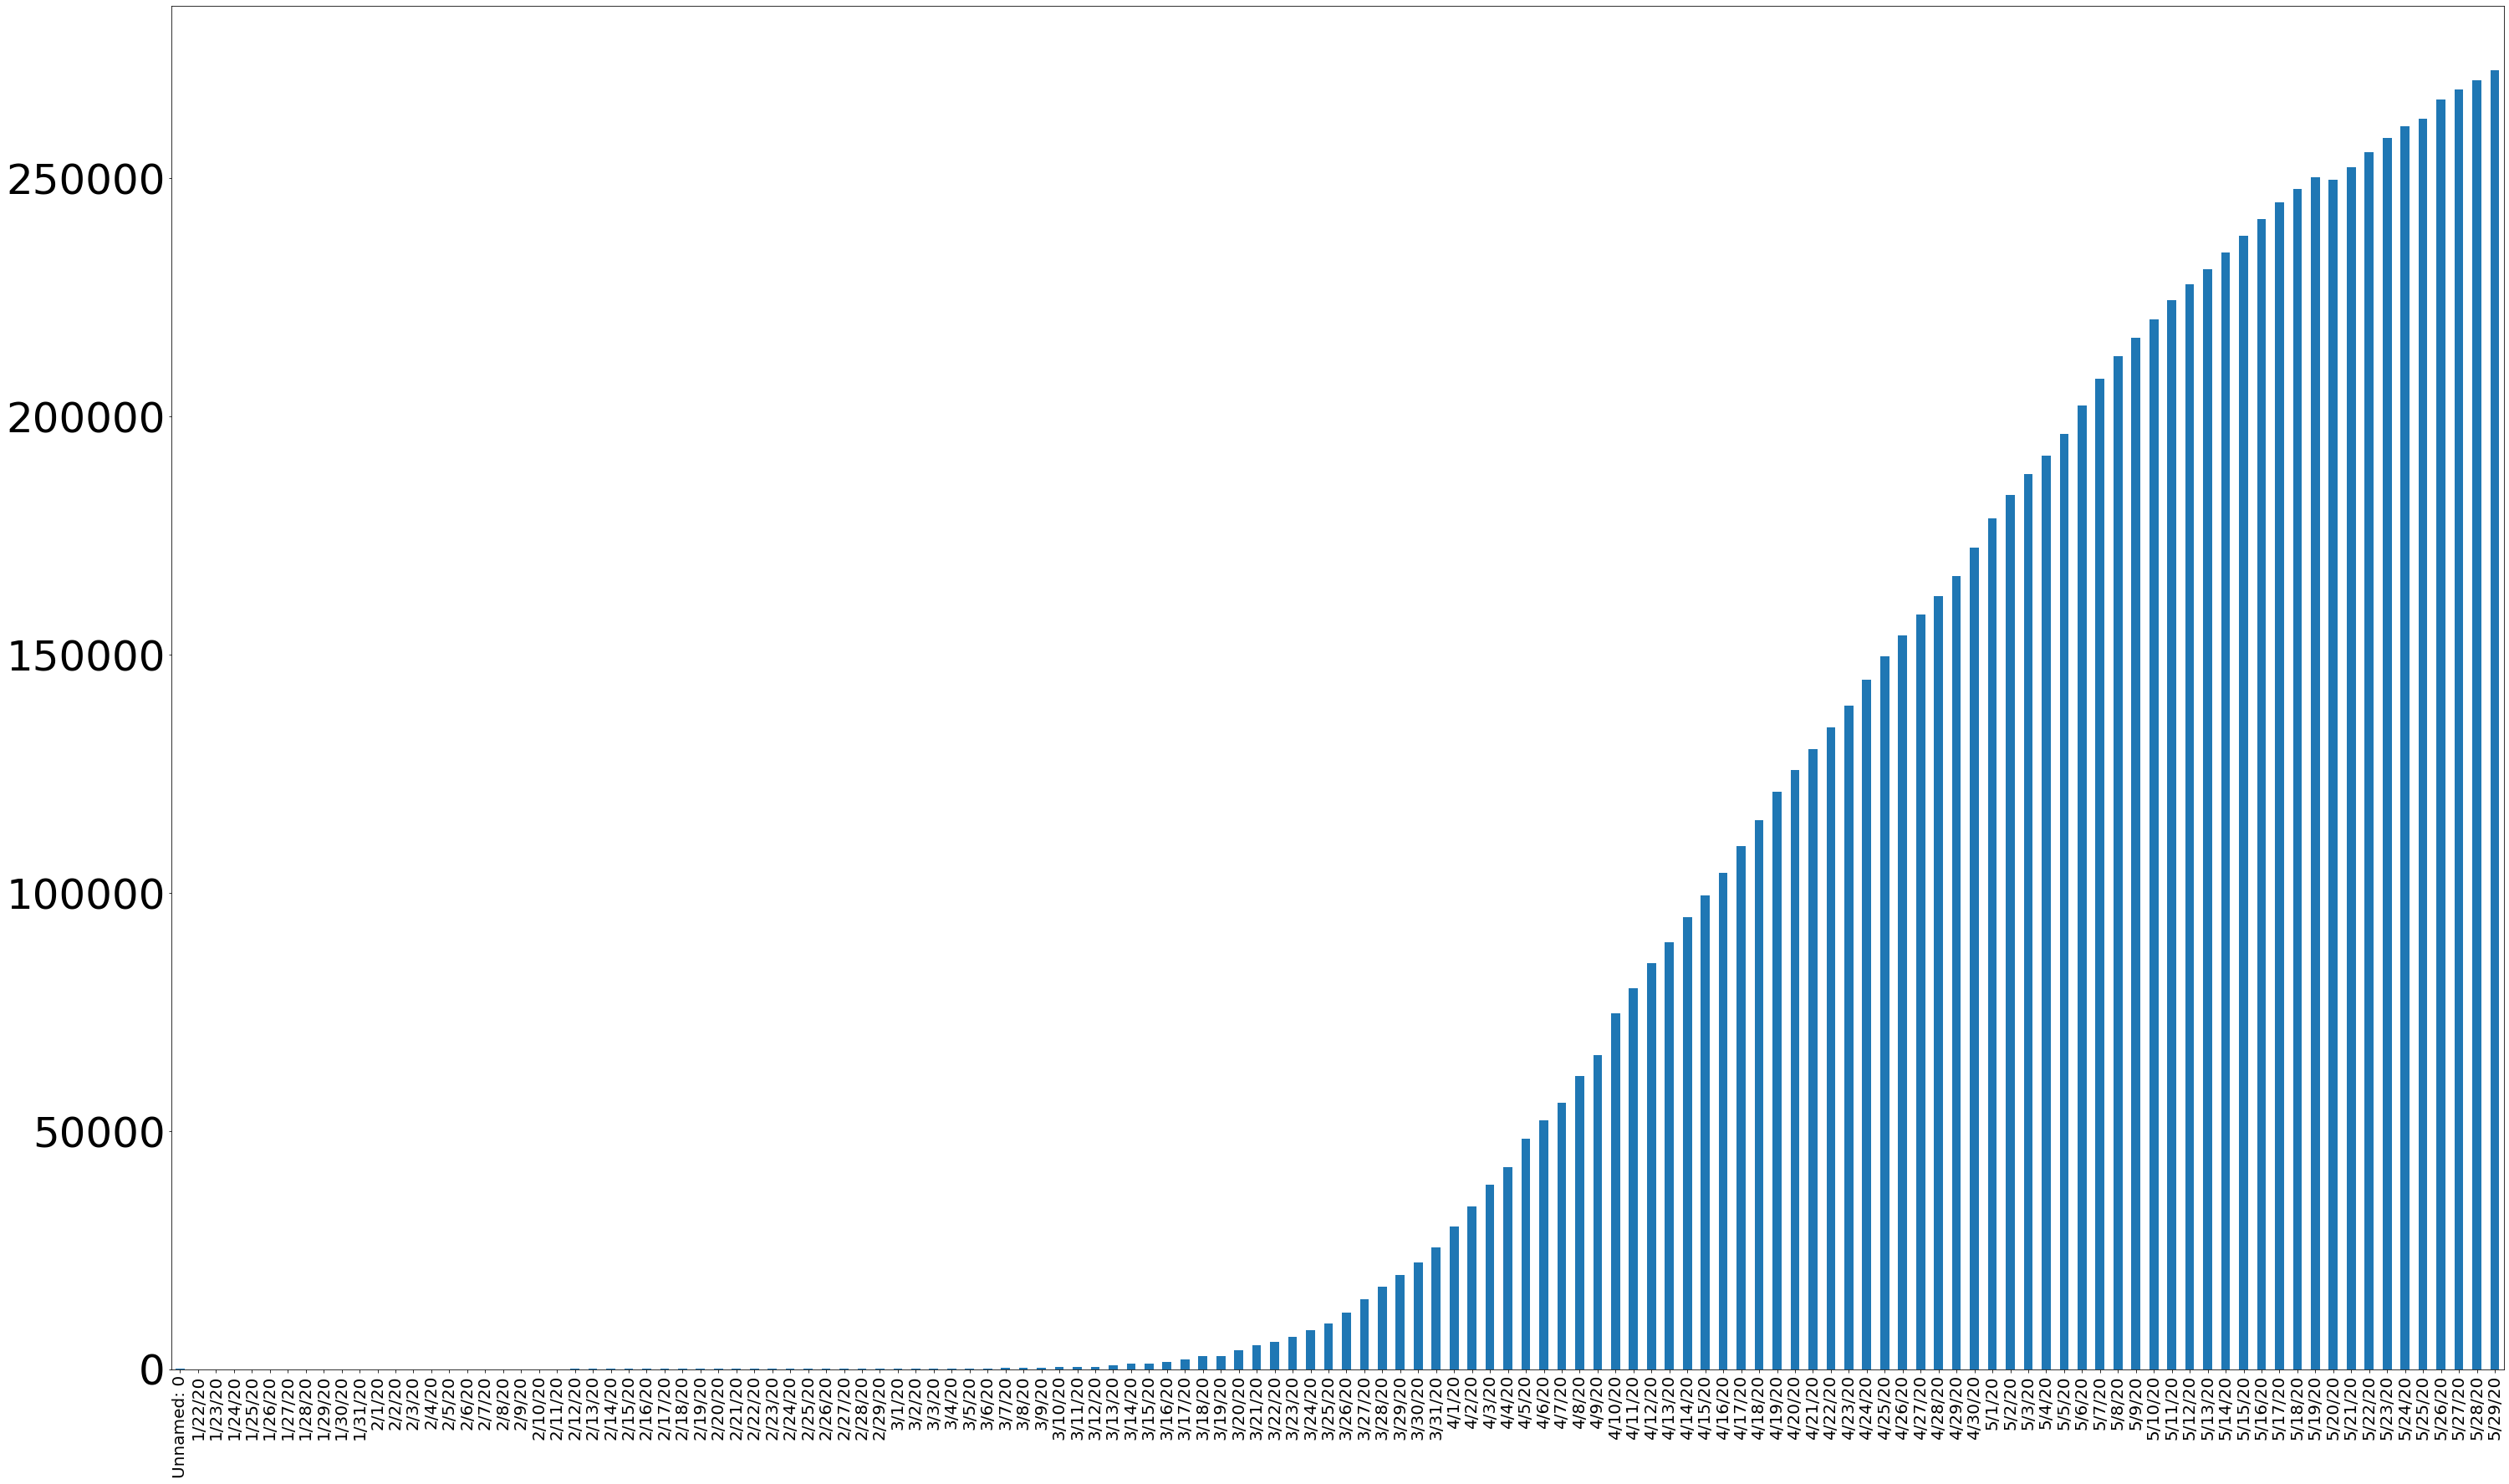

In [79]:
# Confirmed cases in UK
# Similar to the US, number of cases in UK also started increasing from mid of march 



df3.T[154].plot.bar()

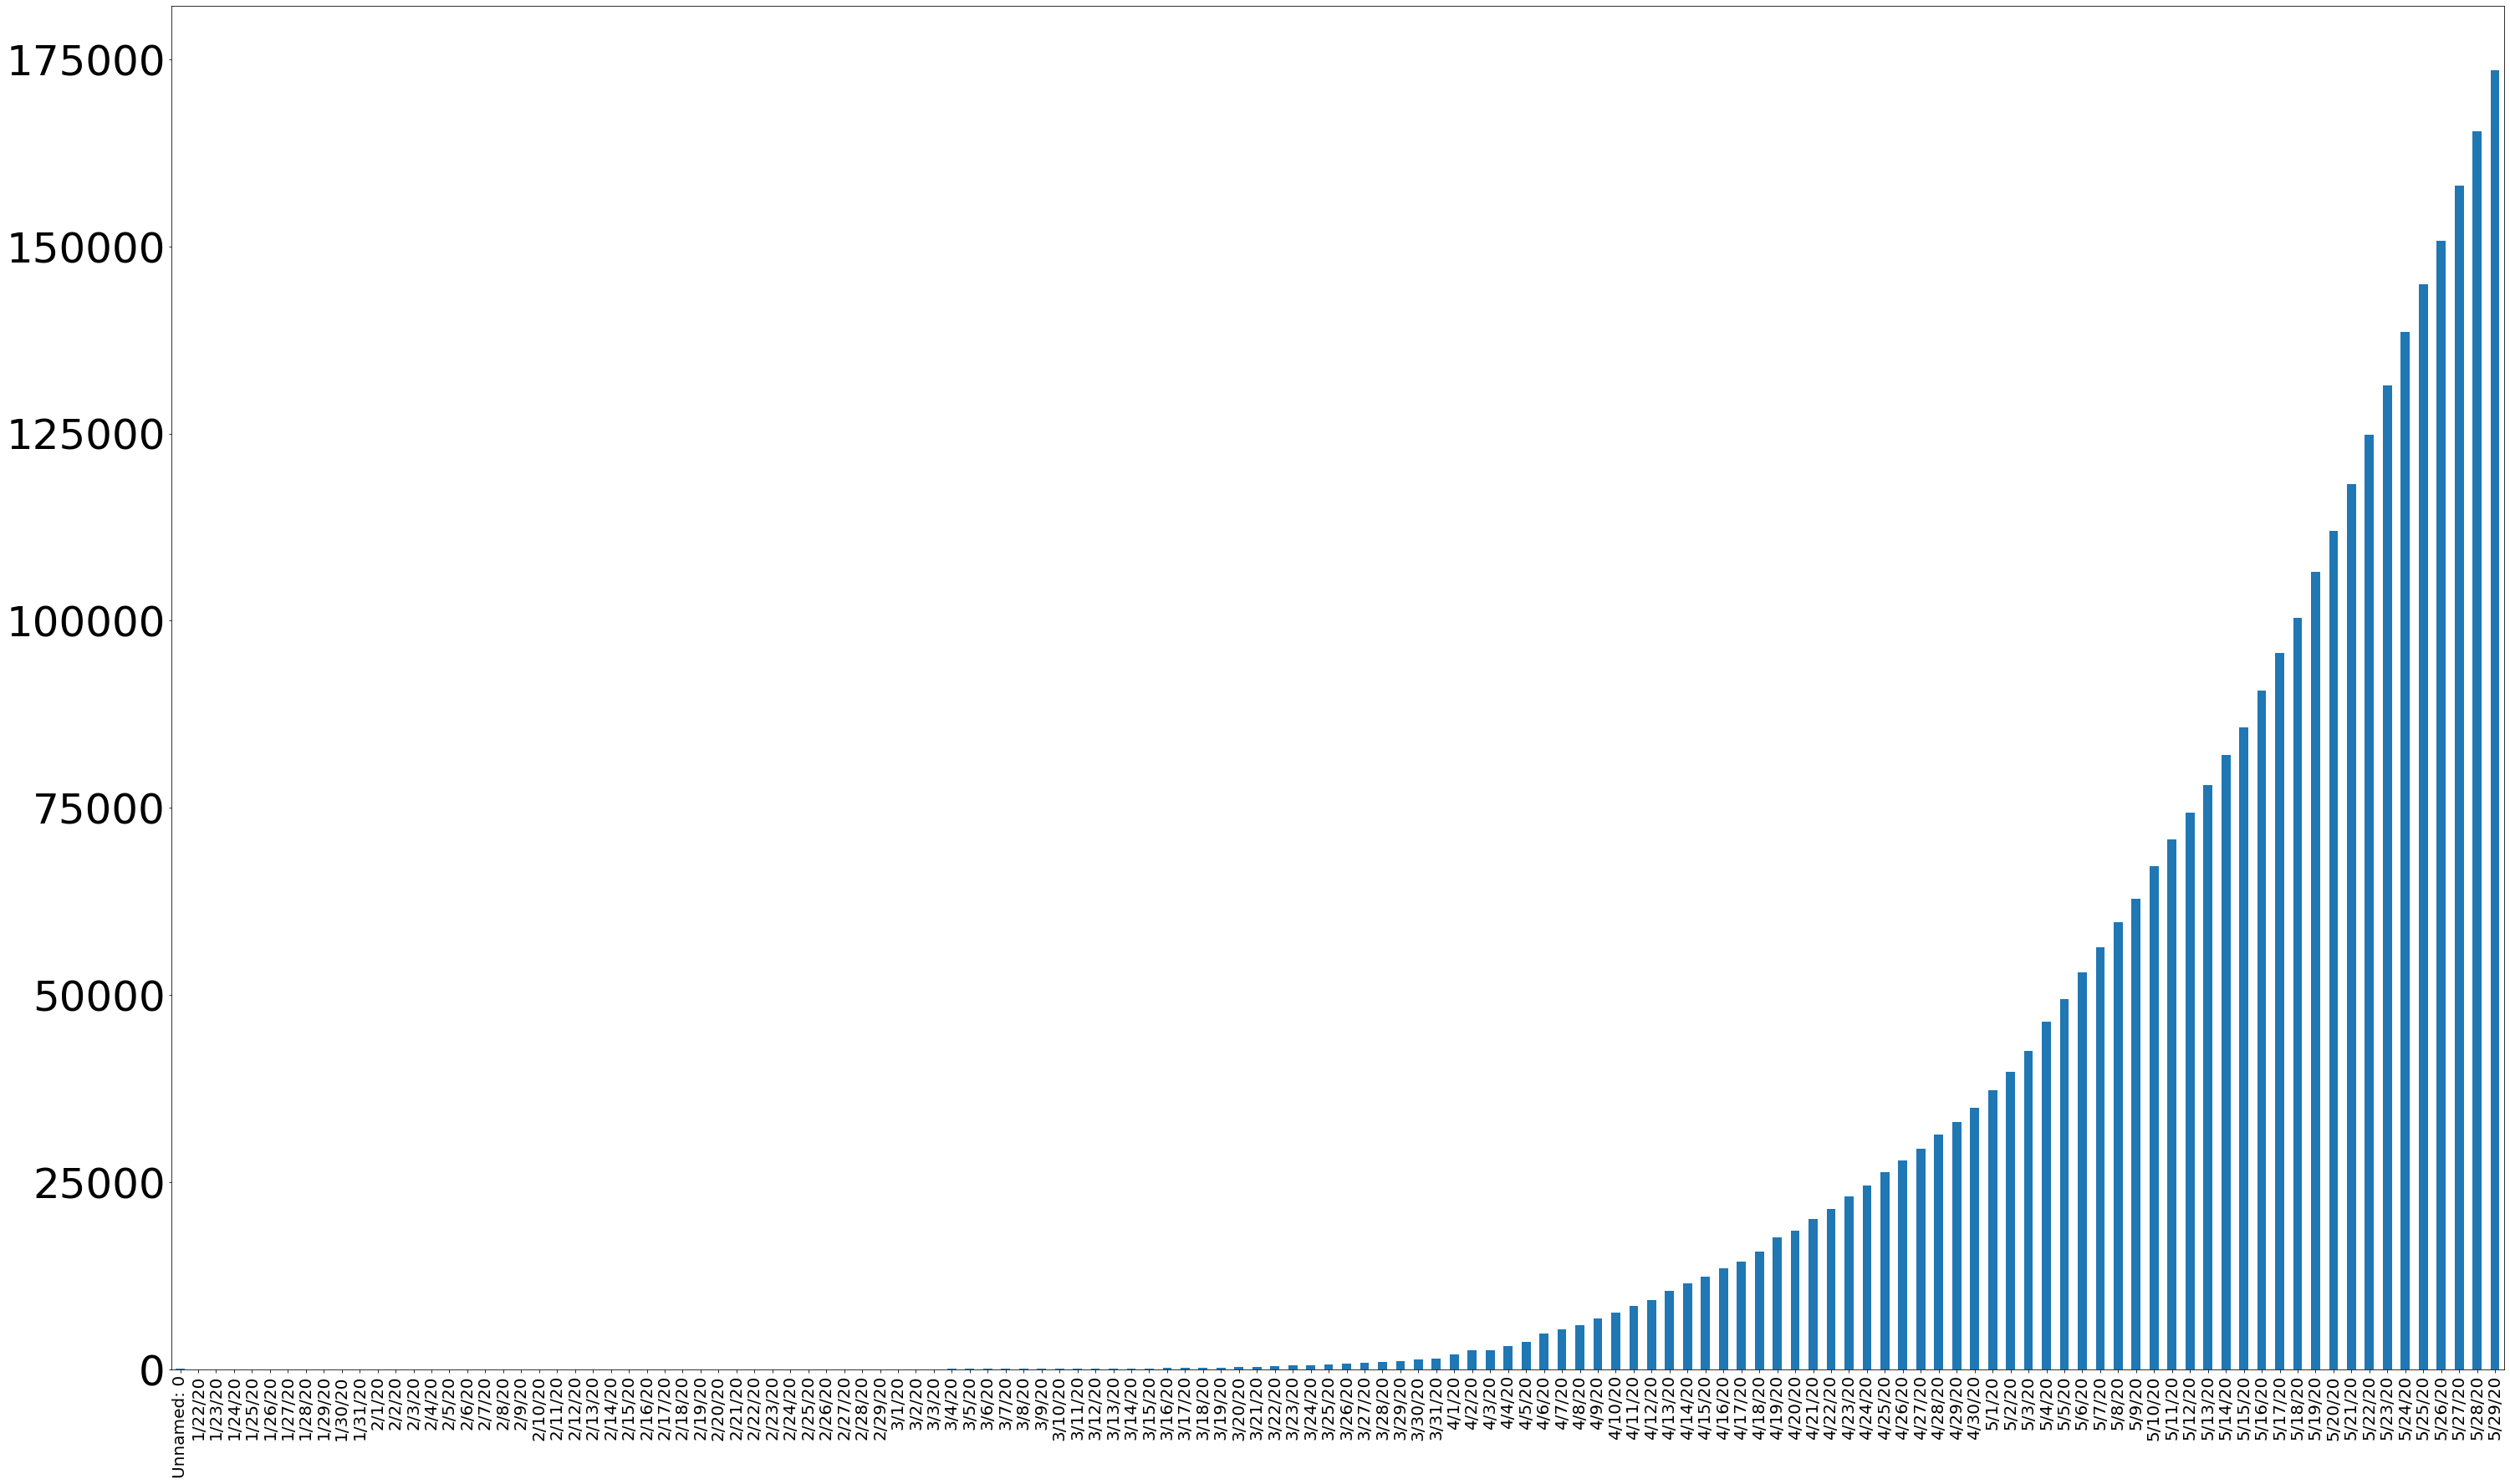

In [80]:
# Confirmed cases in India
# Number of cases in India started increasing from early April



df3.T[71].plot.bar()

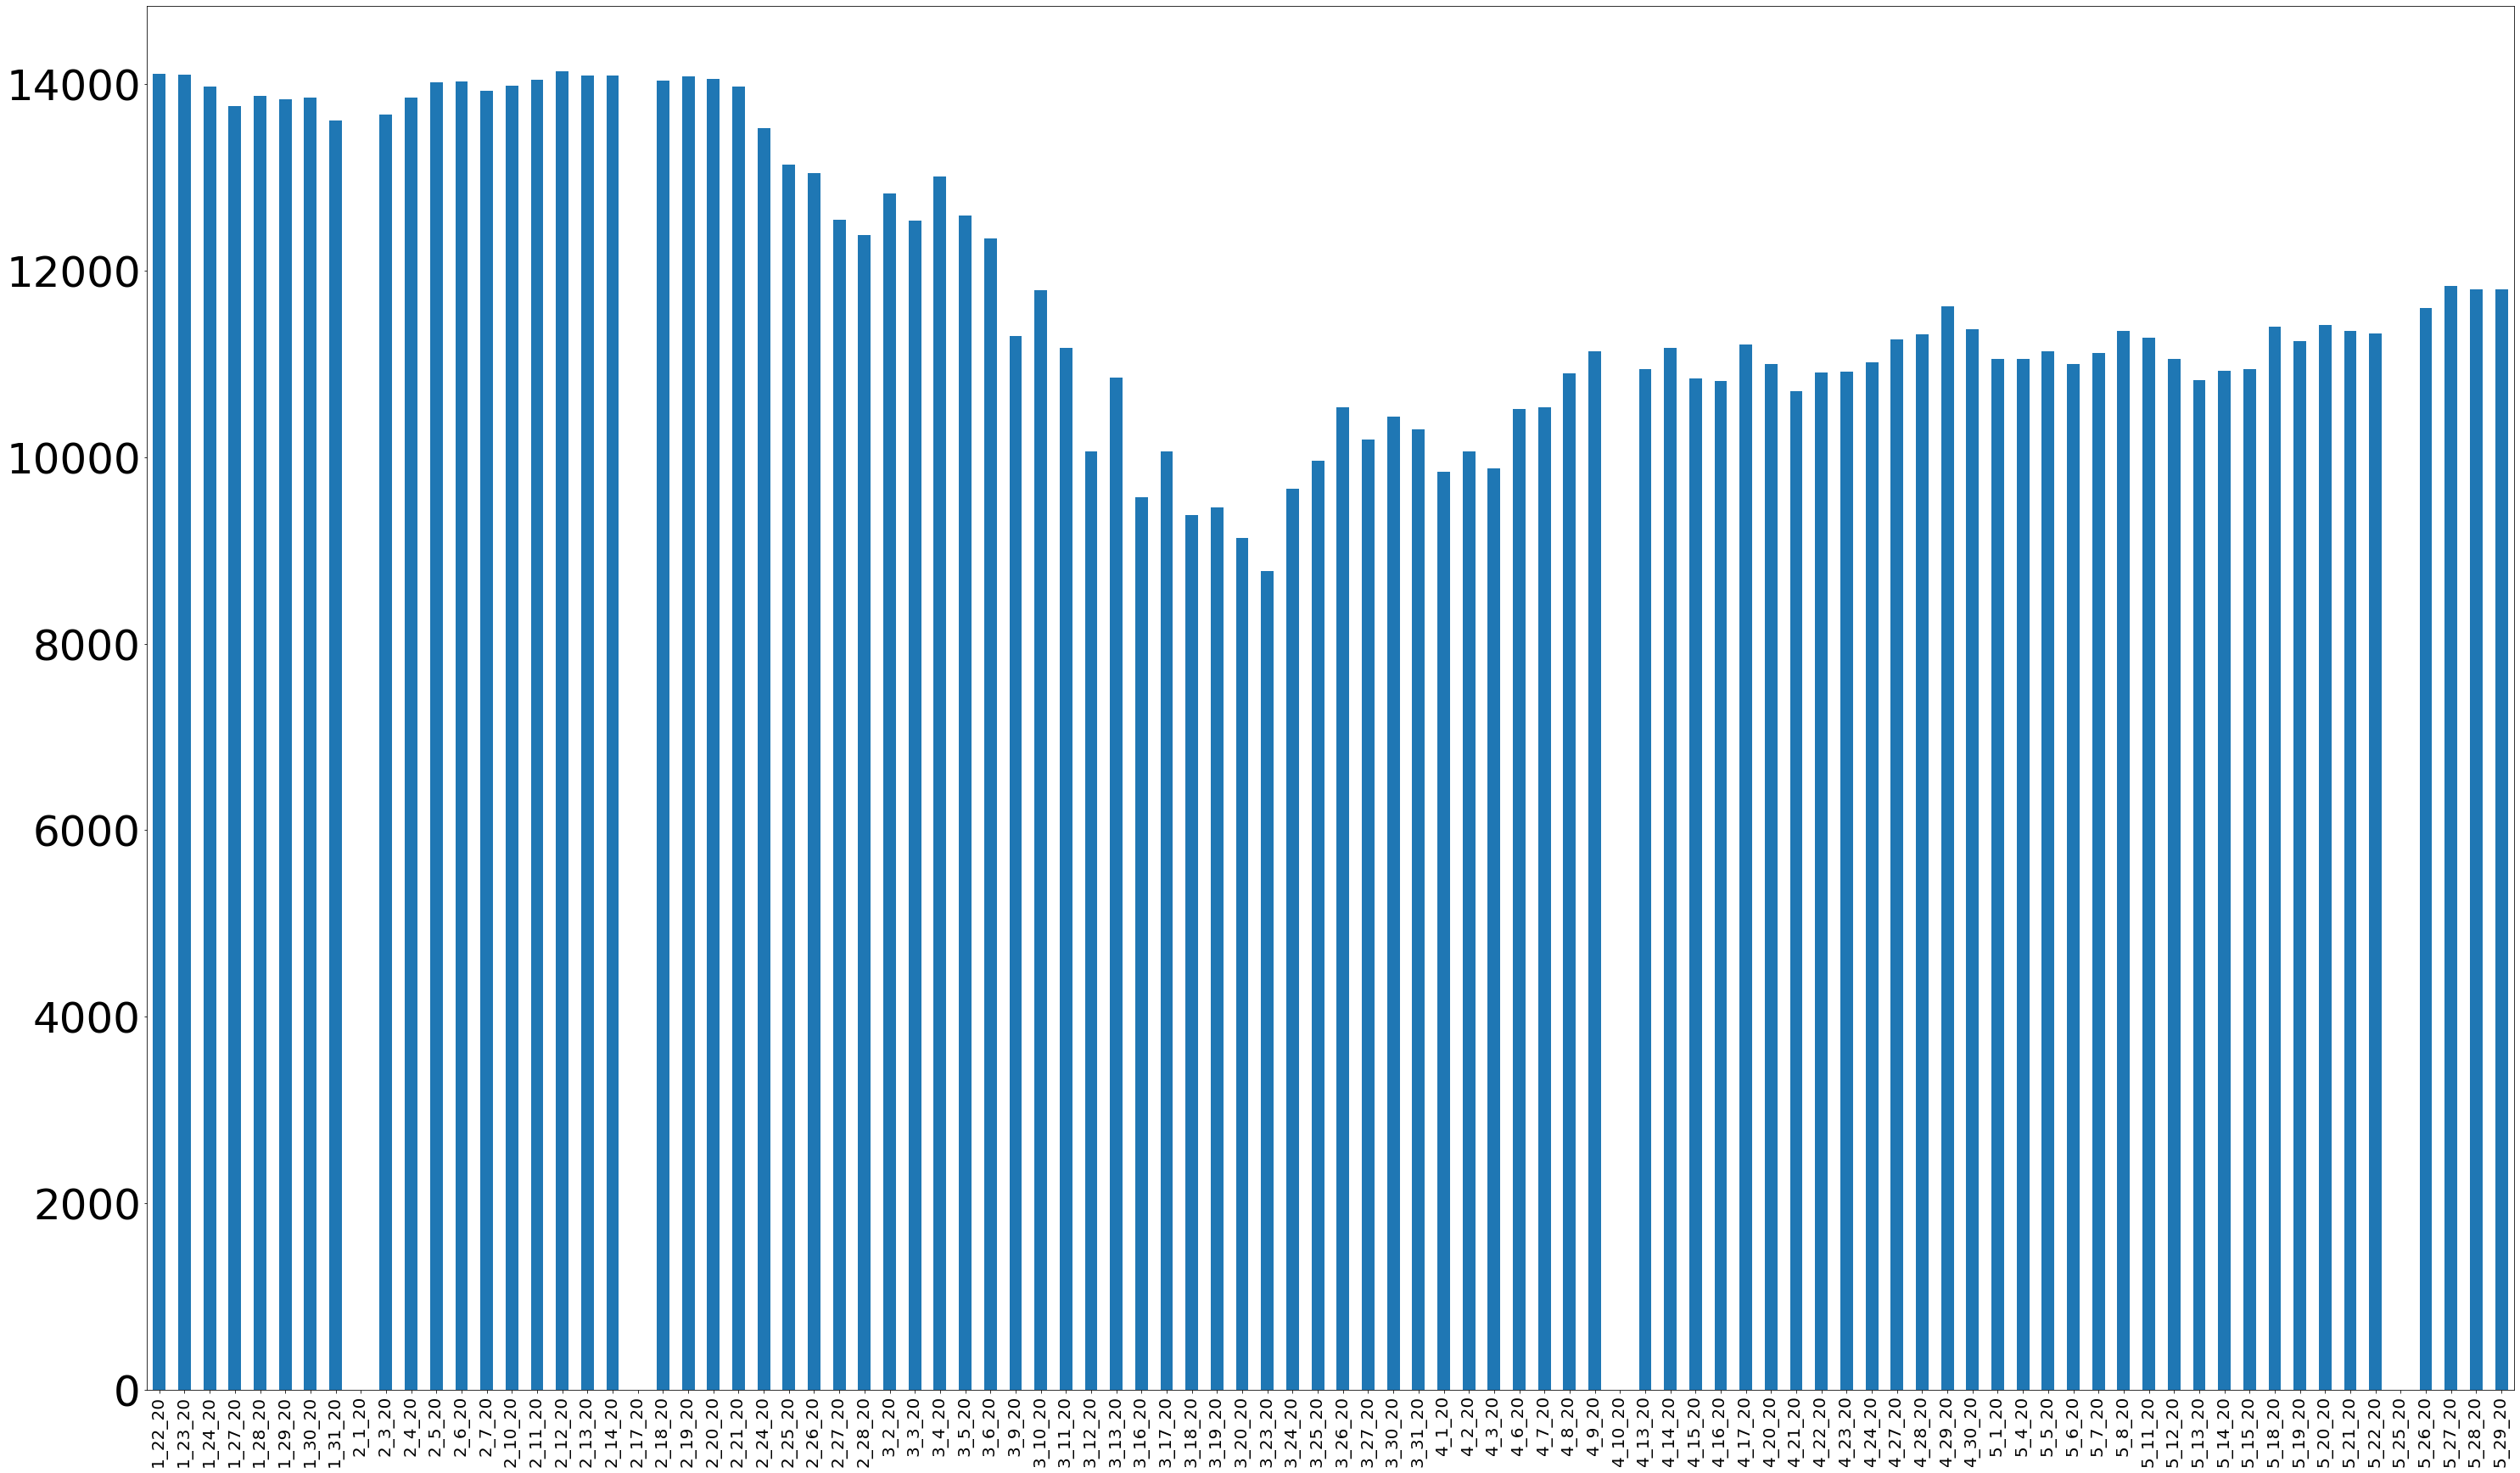

In [64]:
# Plotting a bar graph for the stock trends of NYSE Composite index. 
# The index is going lower starting February which is when COVID cases started to spread in the US, The lowest being mid March.  


api_data.T[1].plot.bar()

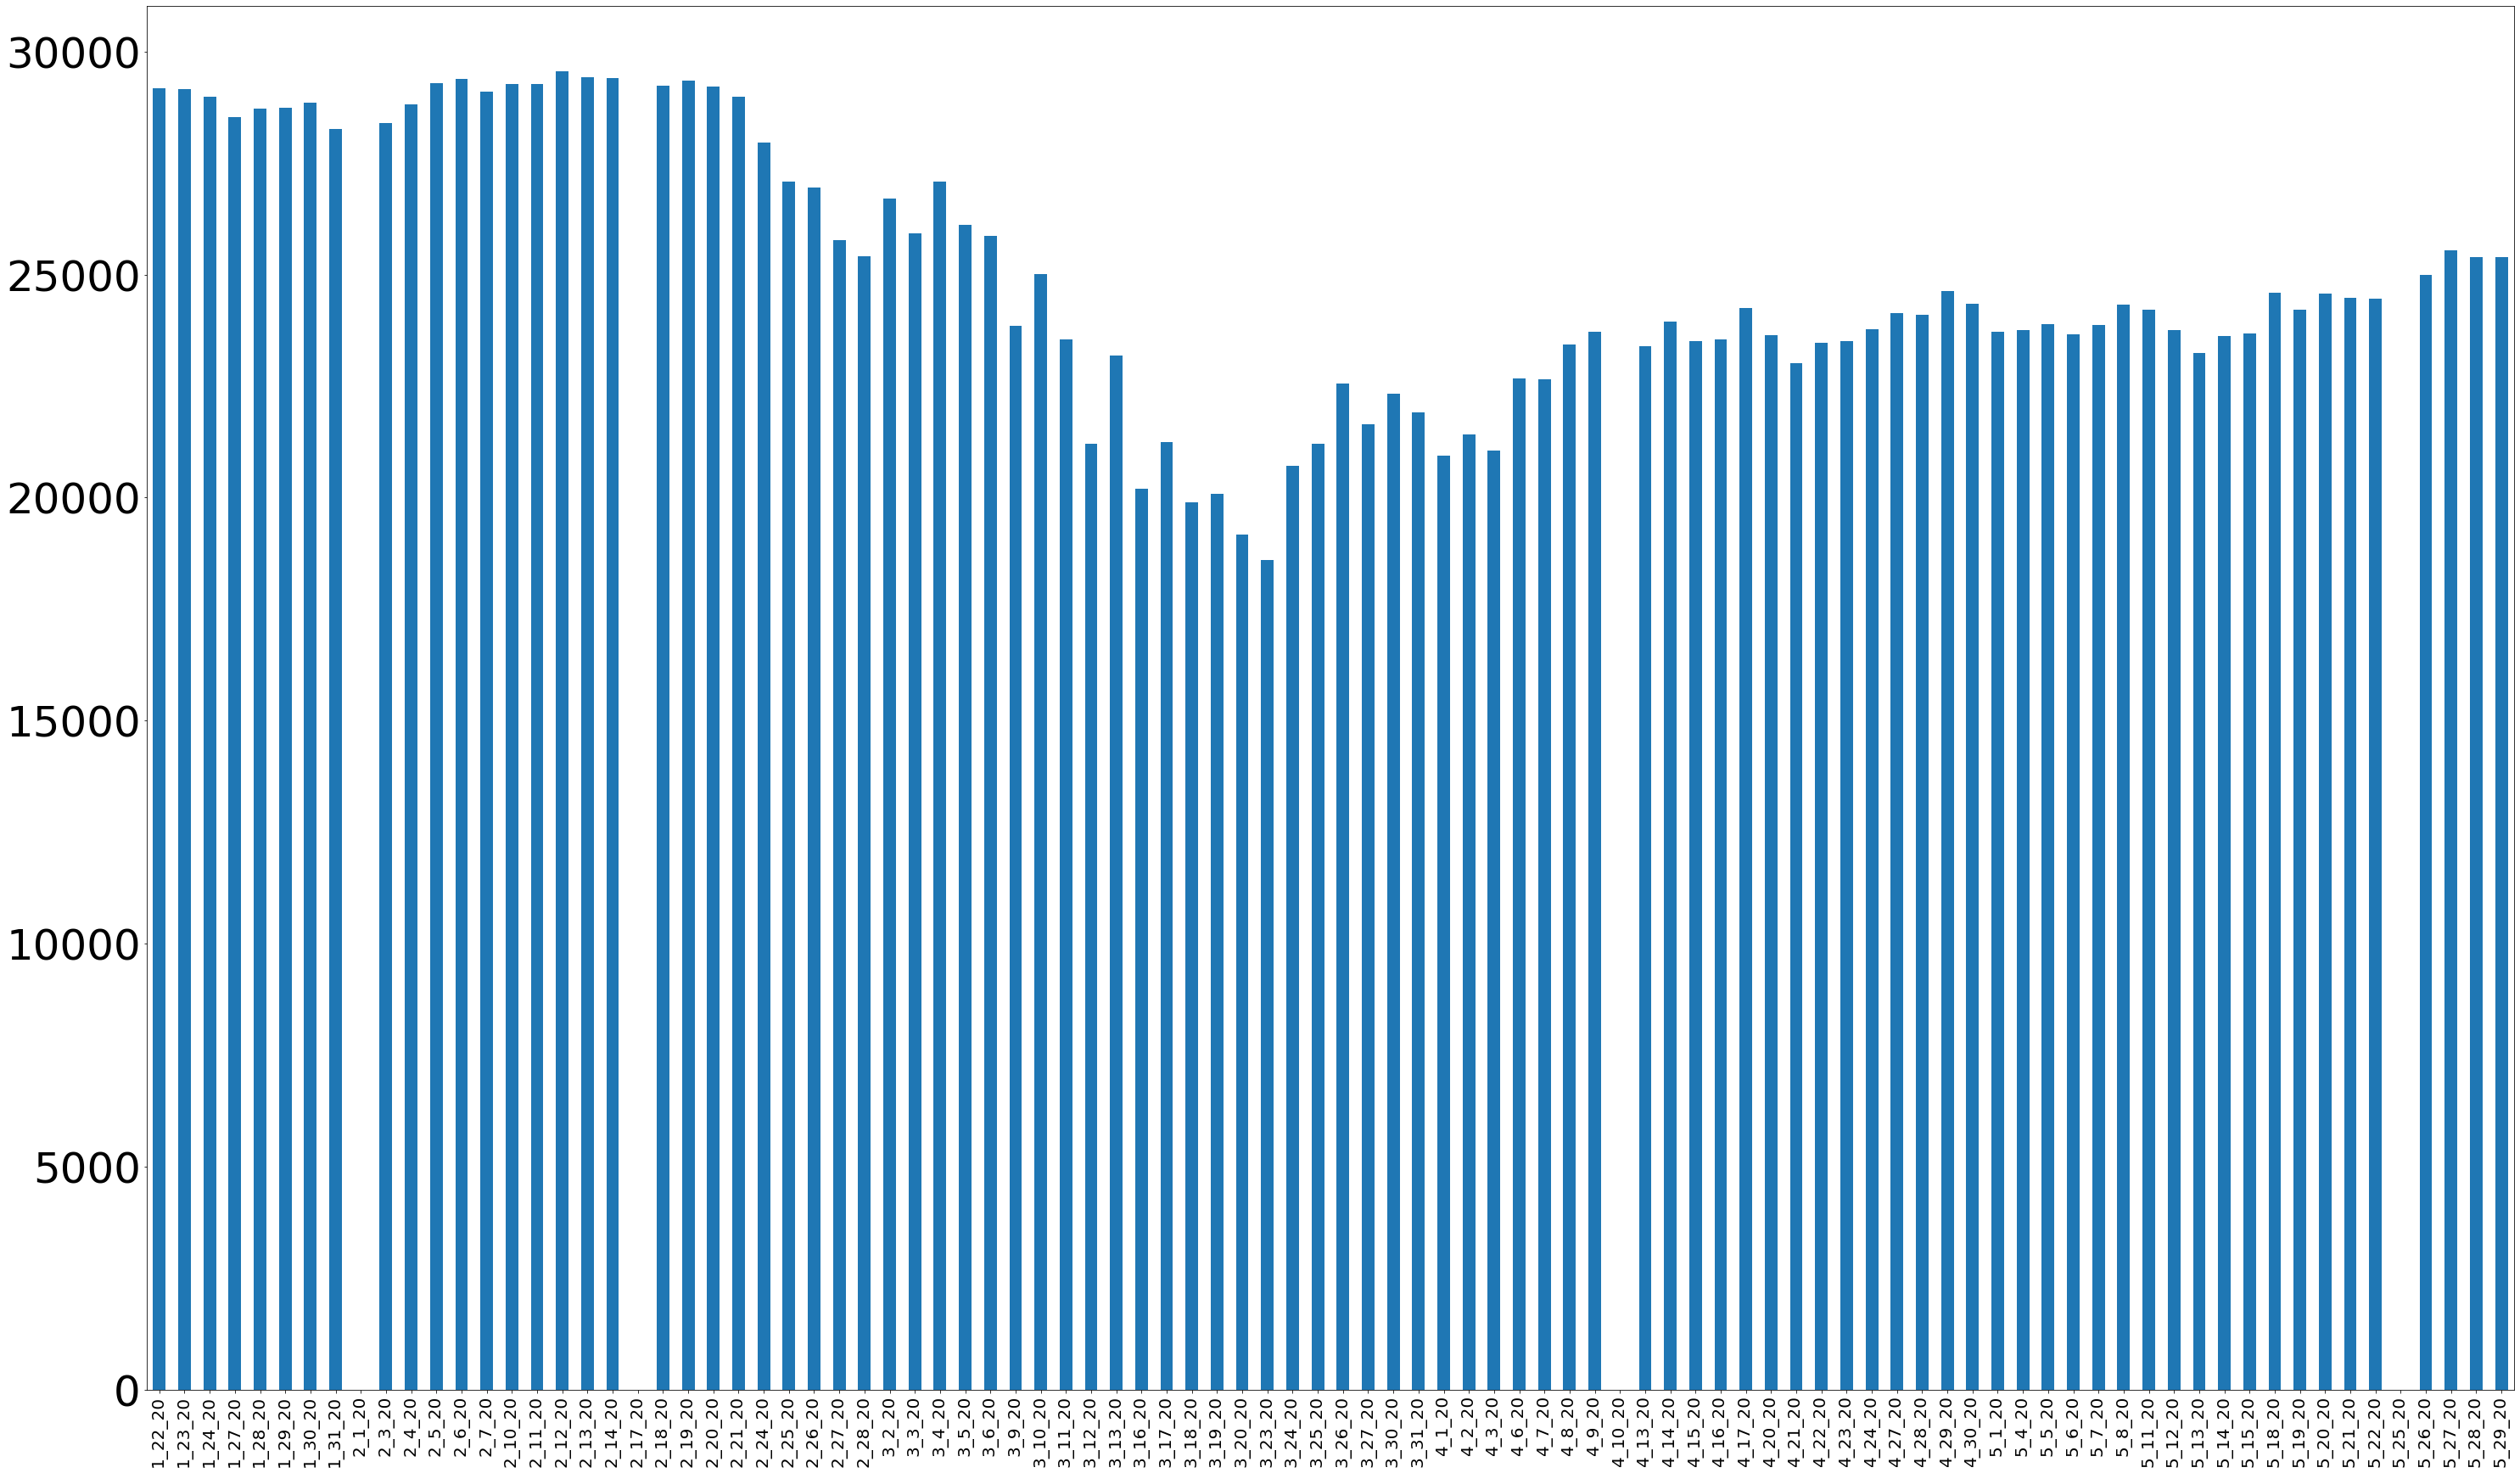

In [65]:
# Plotting a bar graph for the stock trends of Dow Jones Industrial Average. 
# The index is also going lower starting February which is when COVID cases started to spread in the US, The lowest being mid March.  

 

  

api_data.T[3].plot.bar()

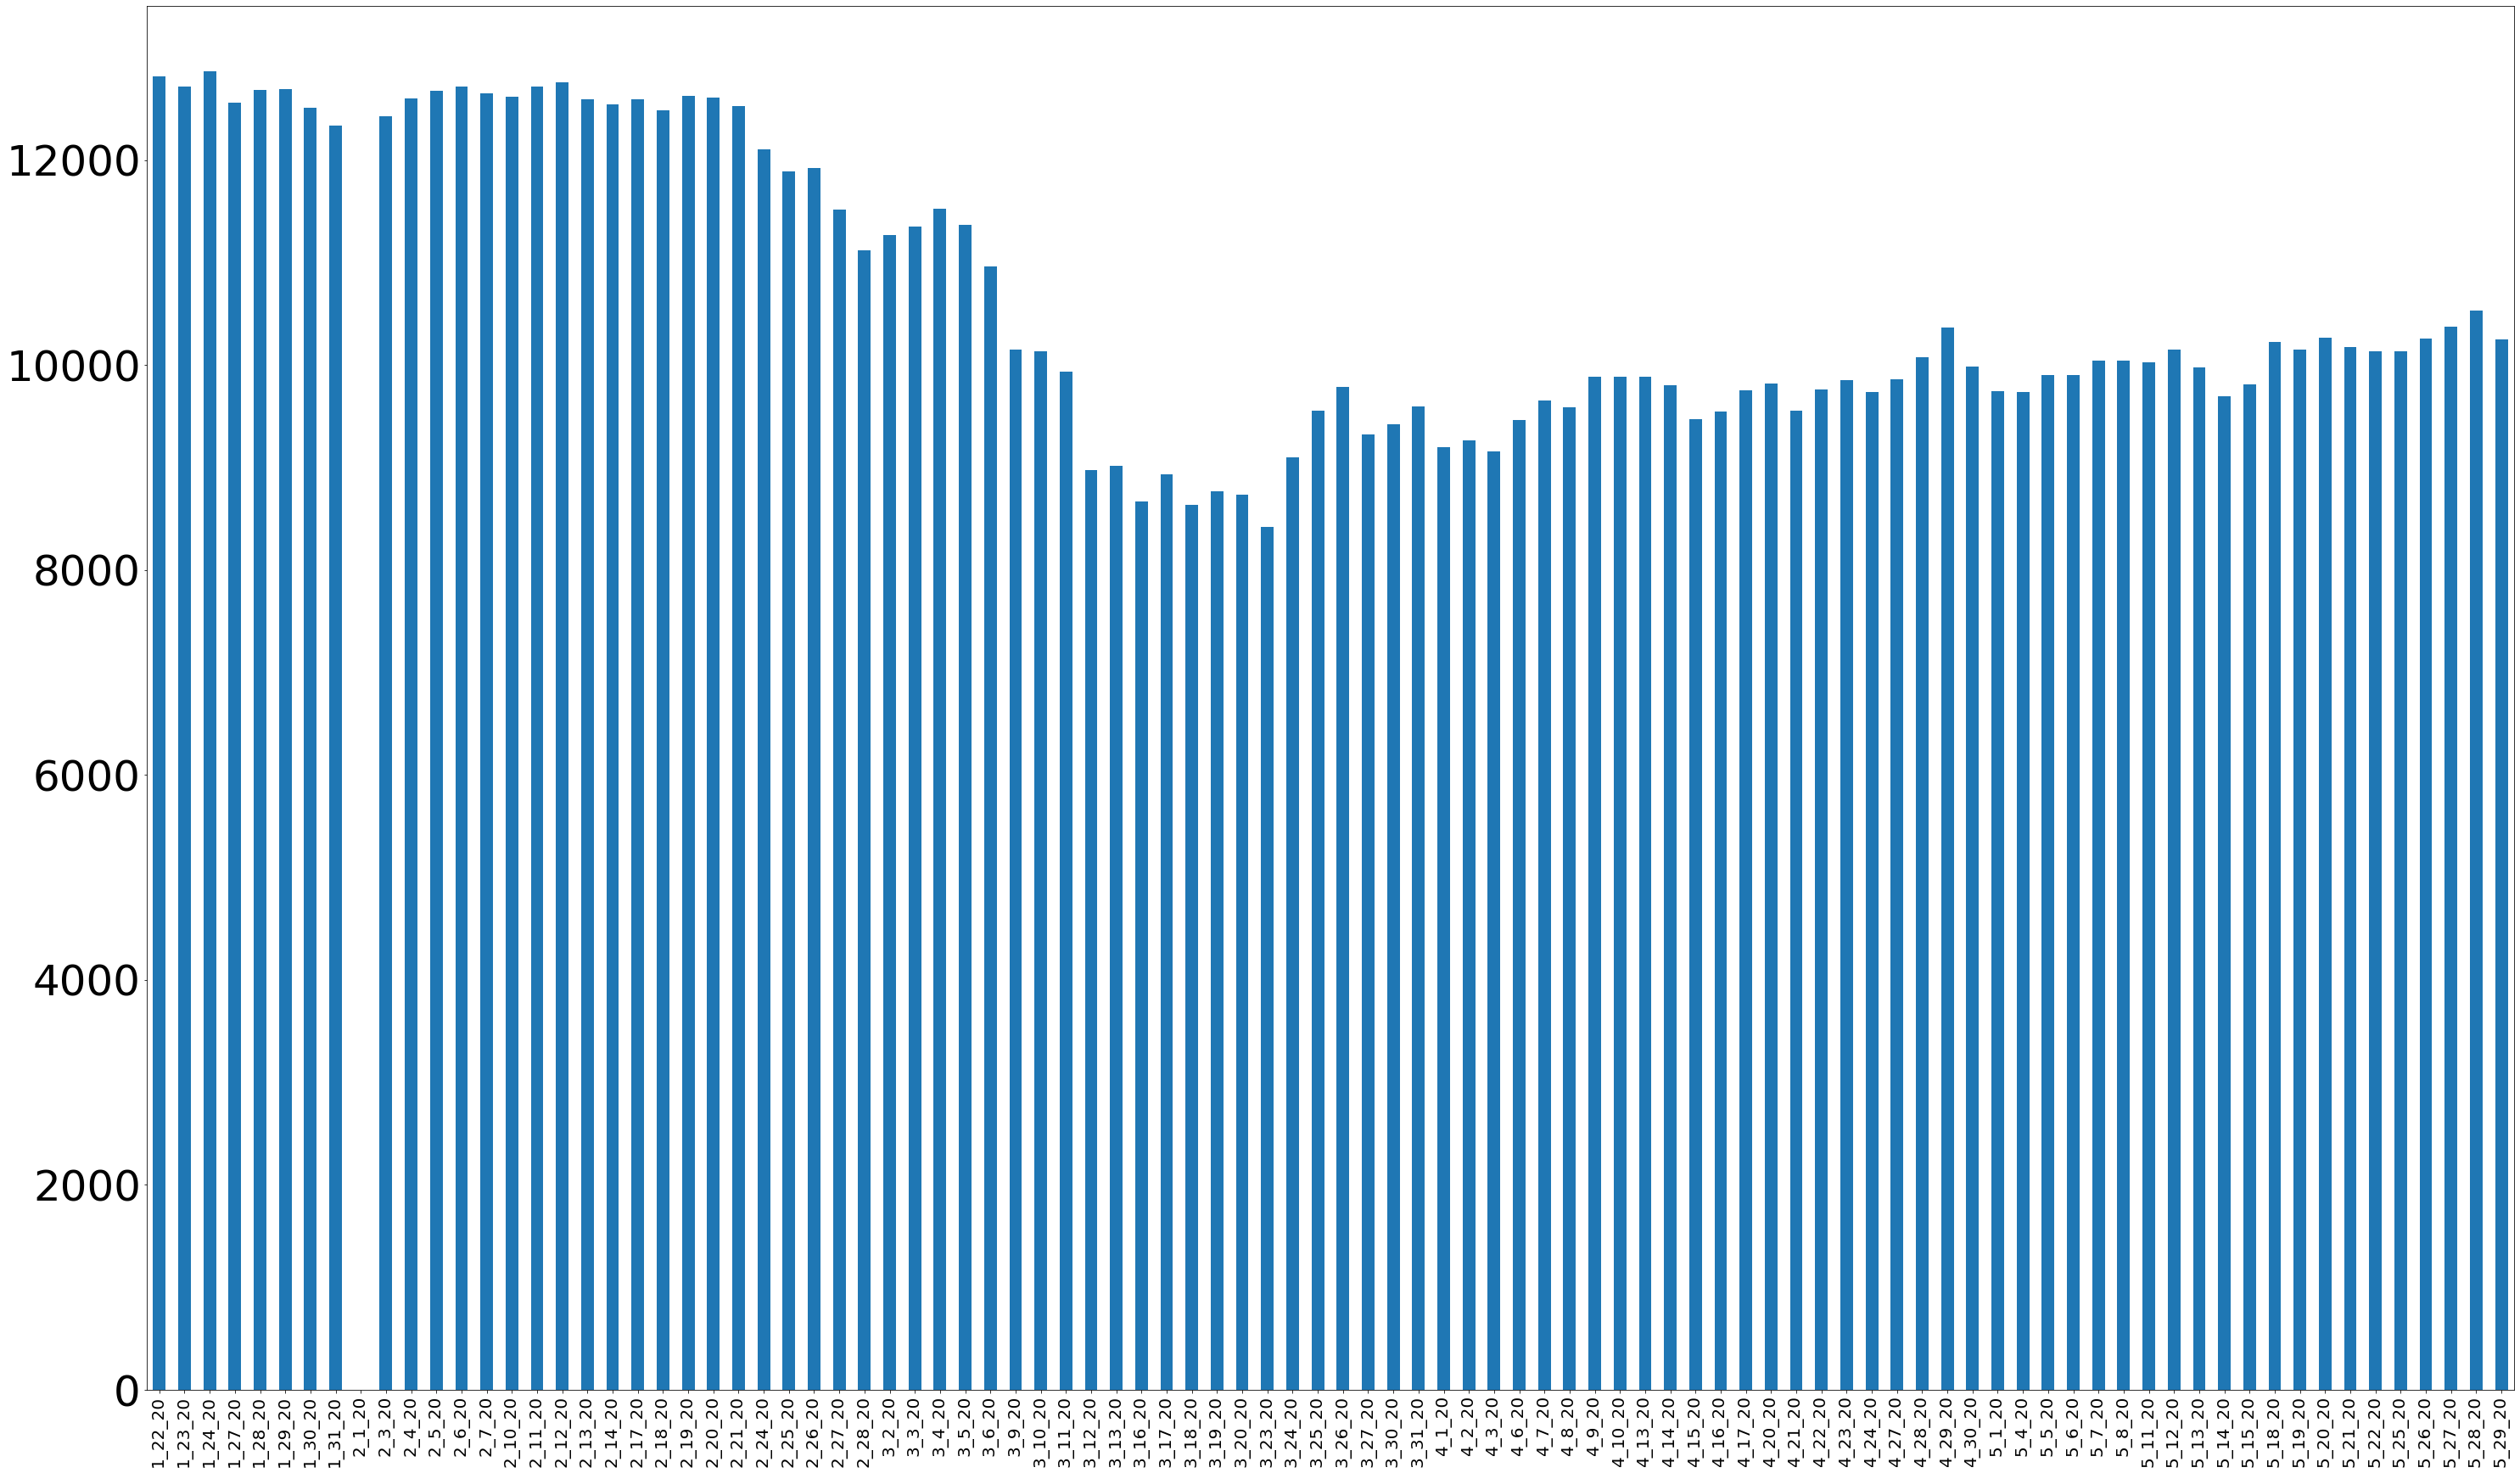

In [66]:
# Plotting a bar graph for the stock trends of CBOE UK 100 INDEX. 
# The index is also going lower starting February which is when COVID cases started to spread in the UK. 

  
api_data.T[5].plot.bar()

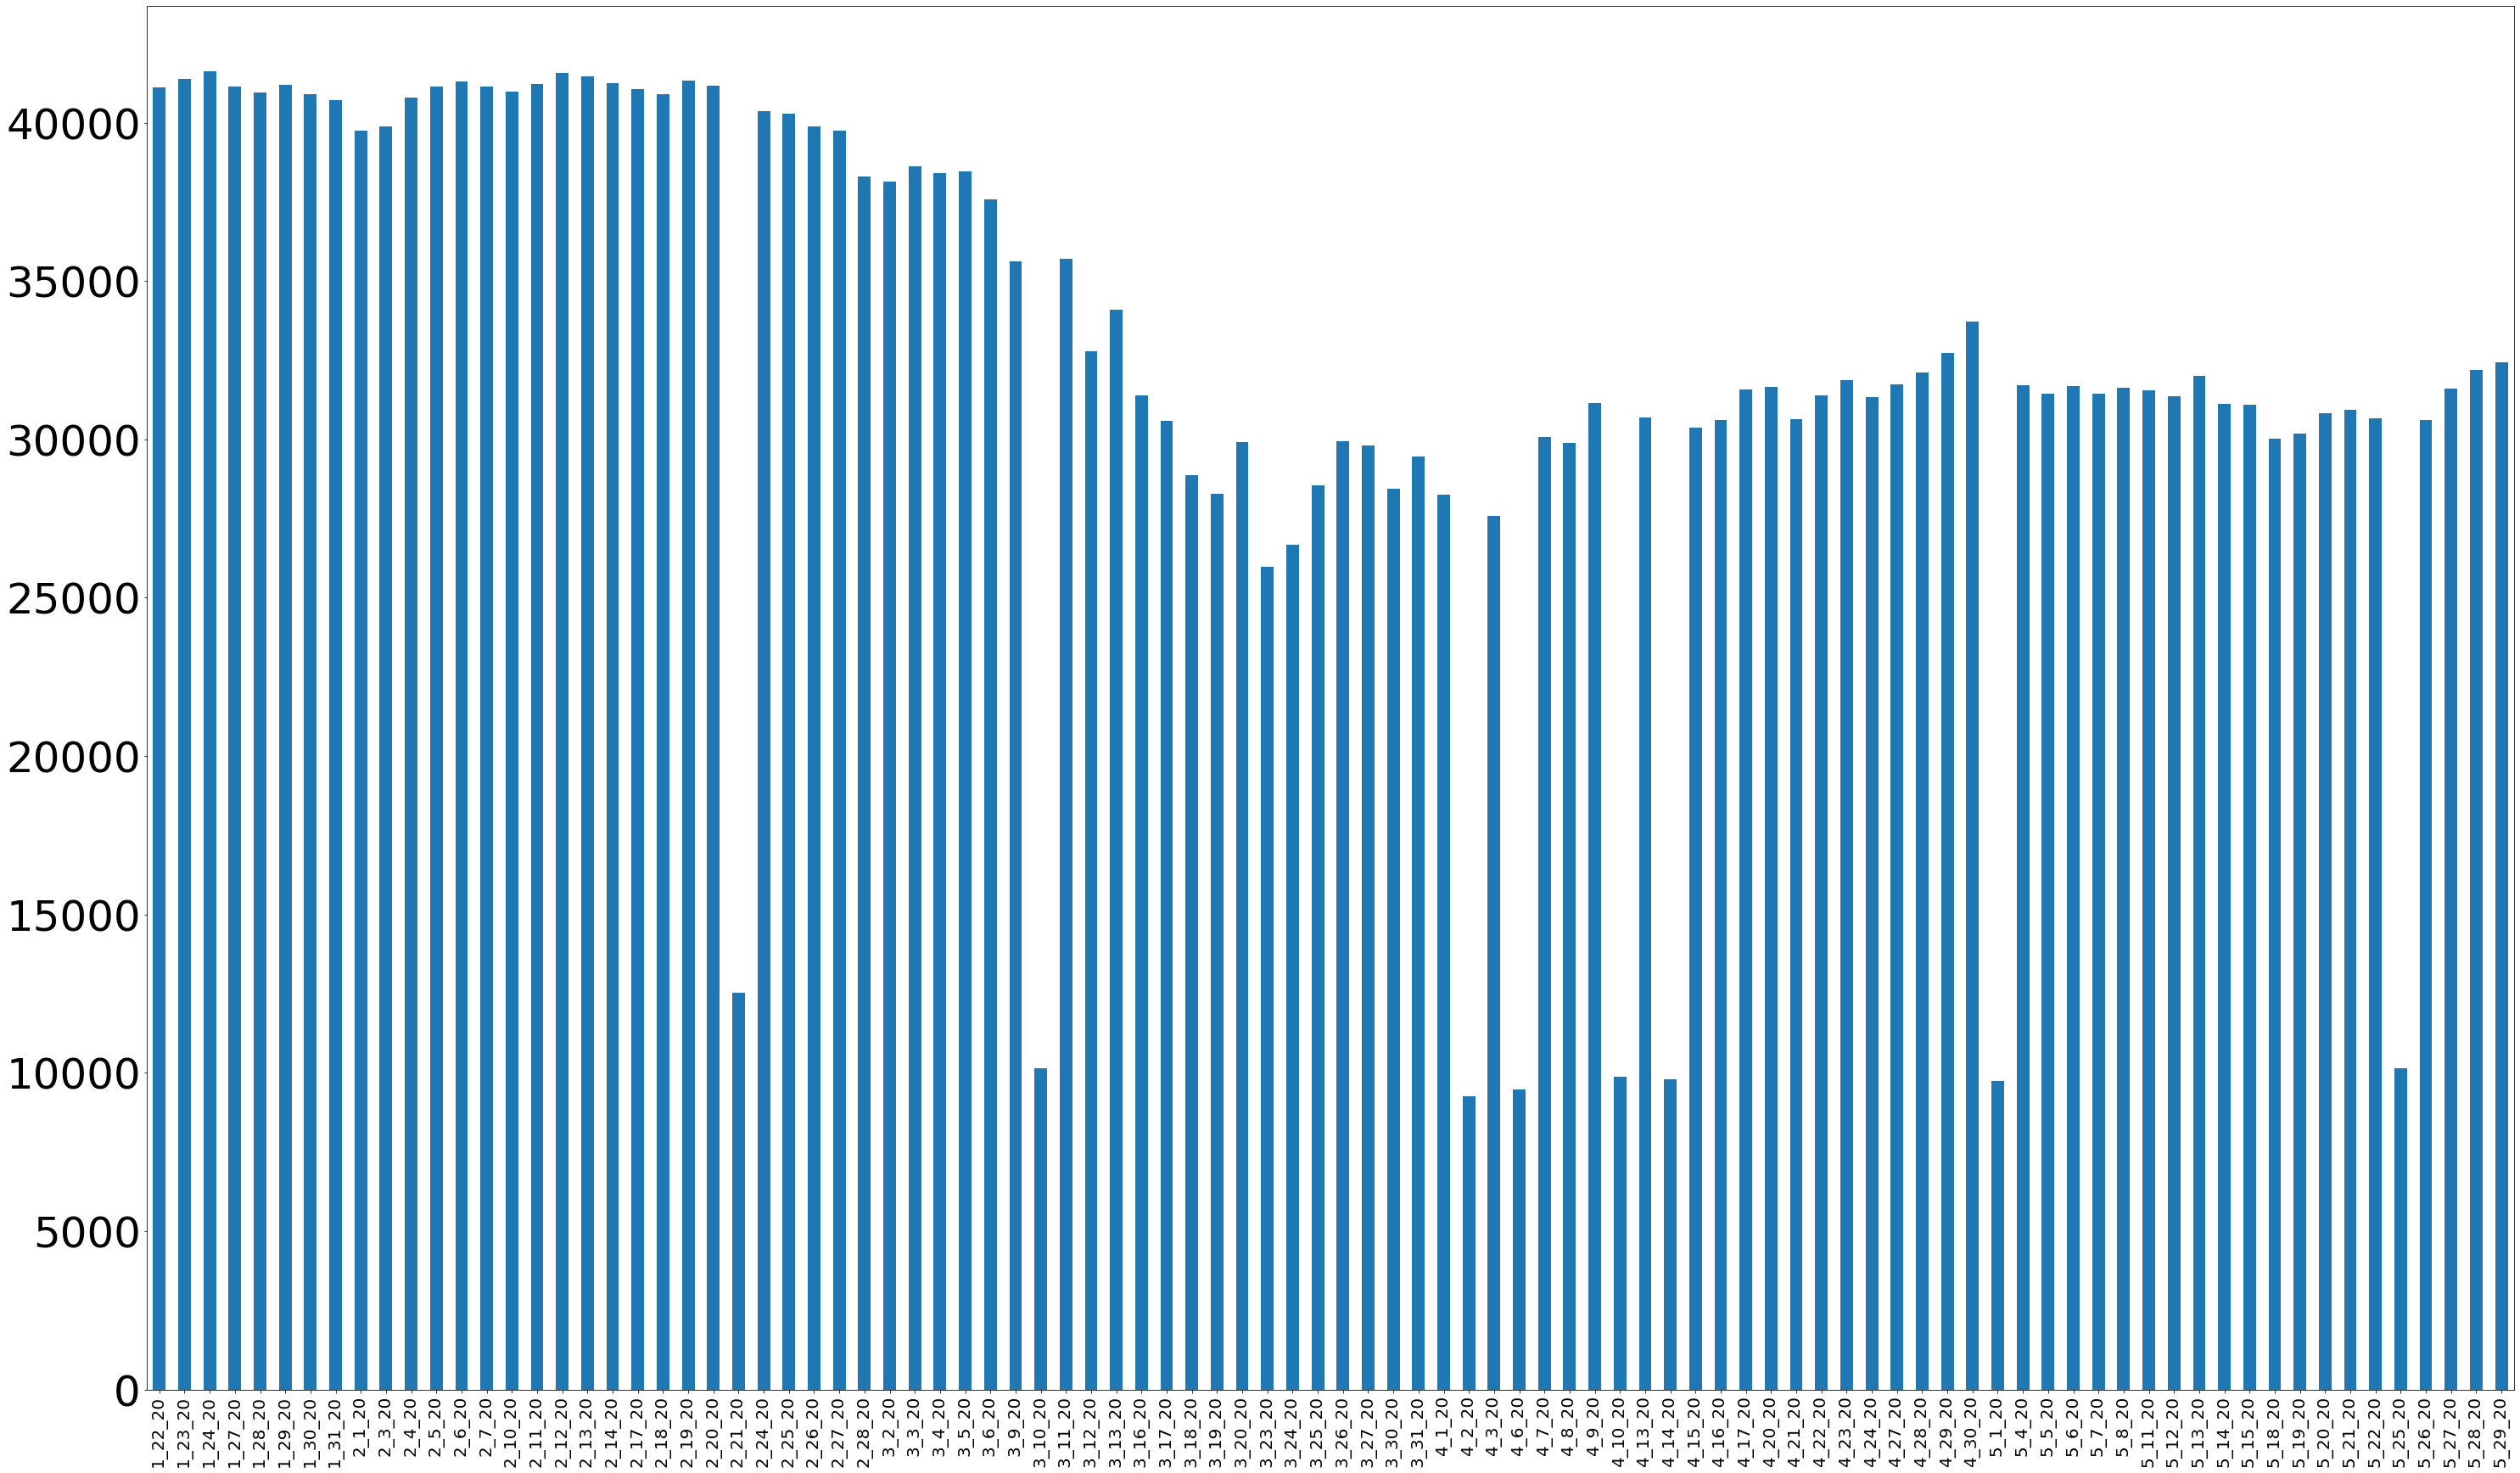

In [67]:
# Plotting a bar graph for the stock trends of S&P BSE SENSEX (^BSESN). 
# The index is also going lower starting February which is when COVID cases started to spread. 


api_data.T[7].plot.bar()